#### 붓꽃 데이터의 차원축소

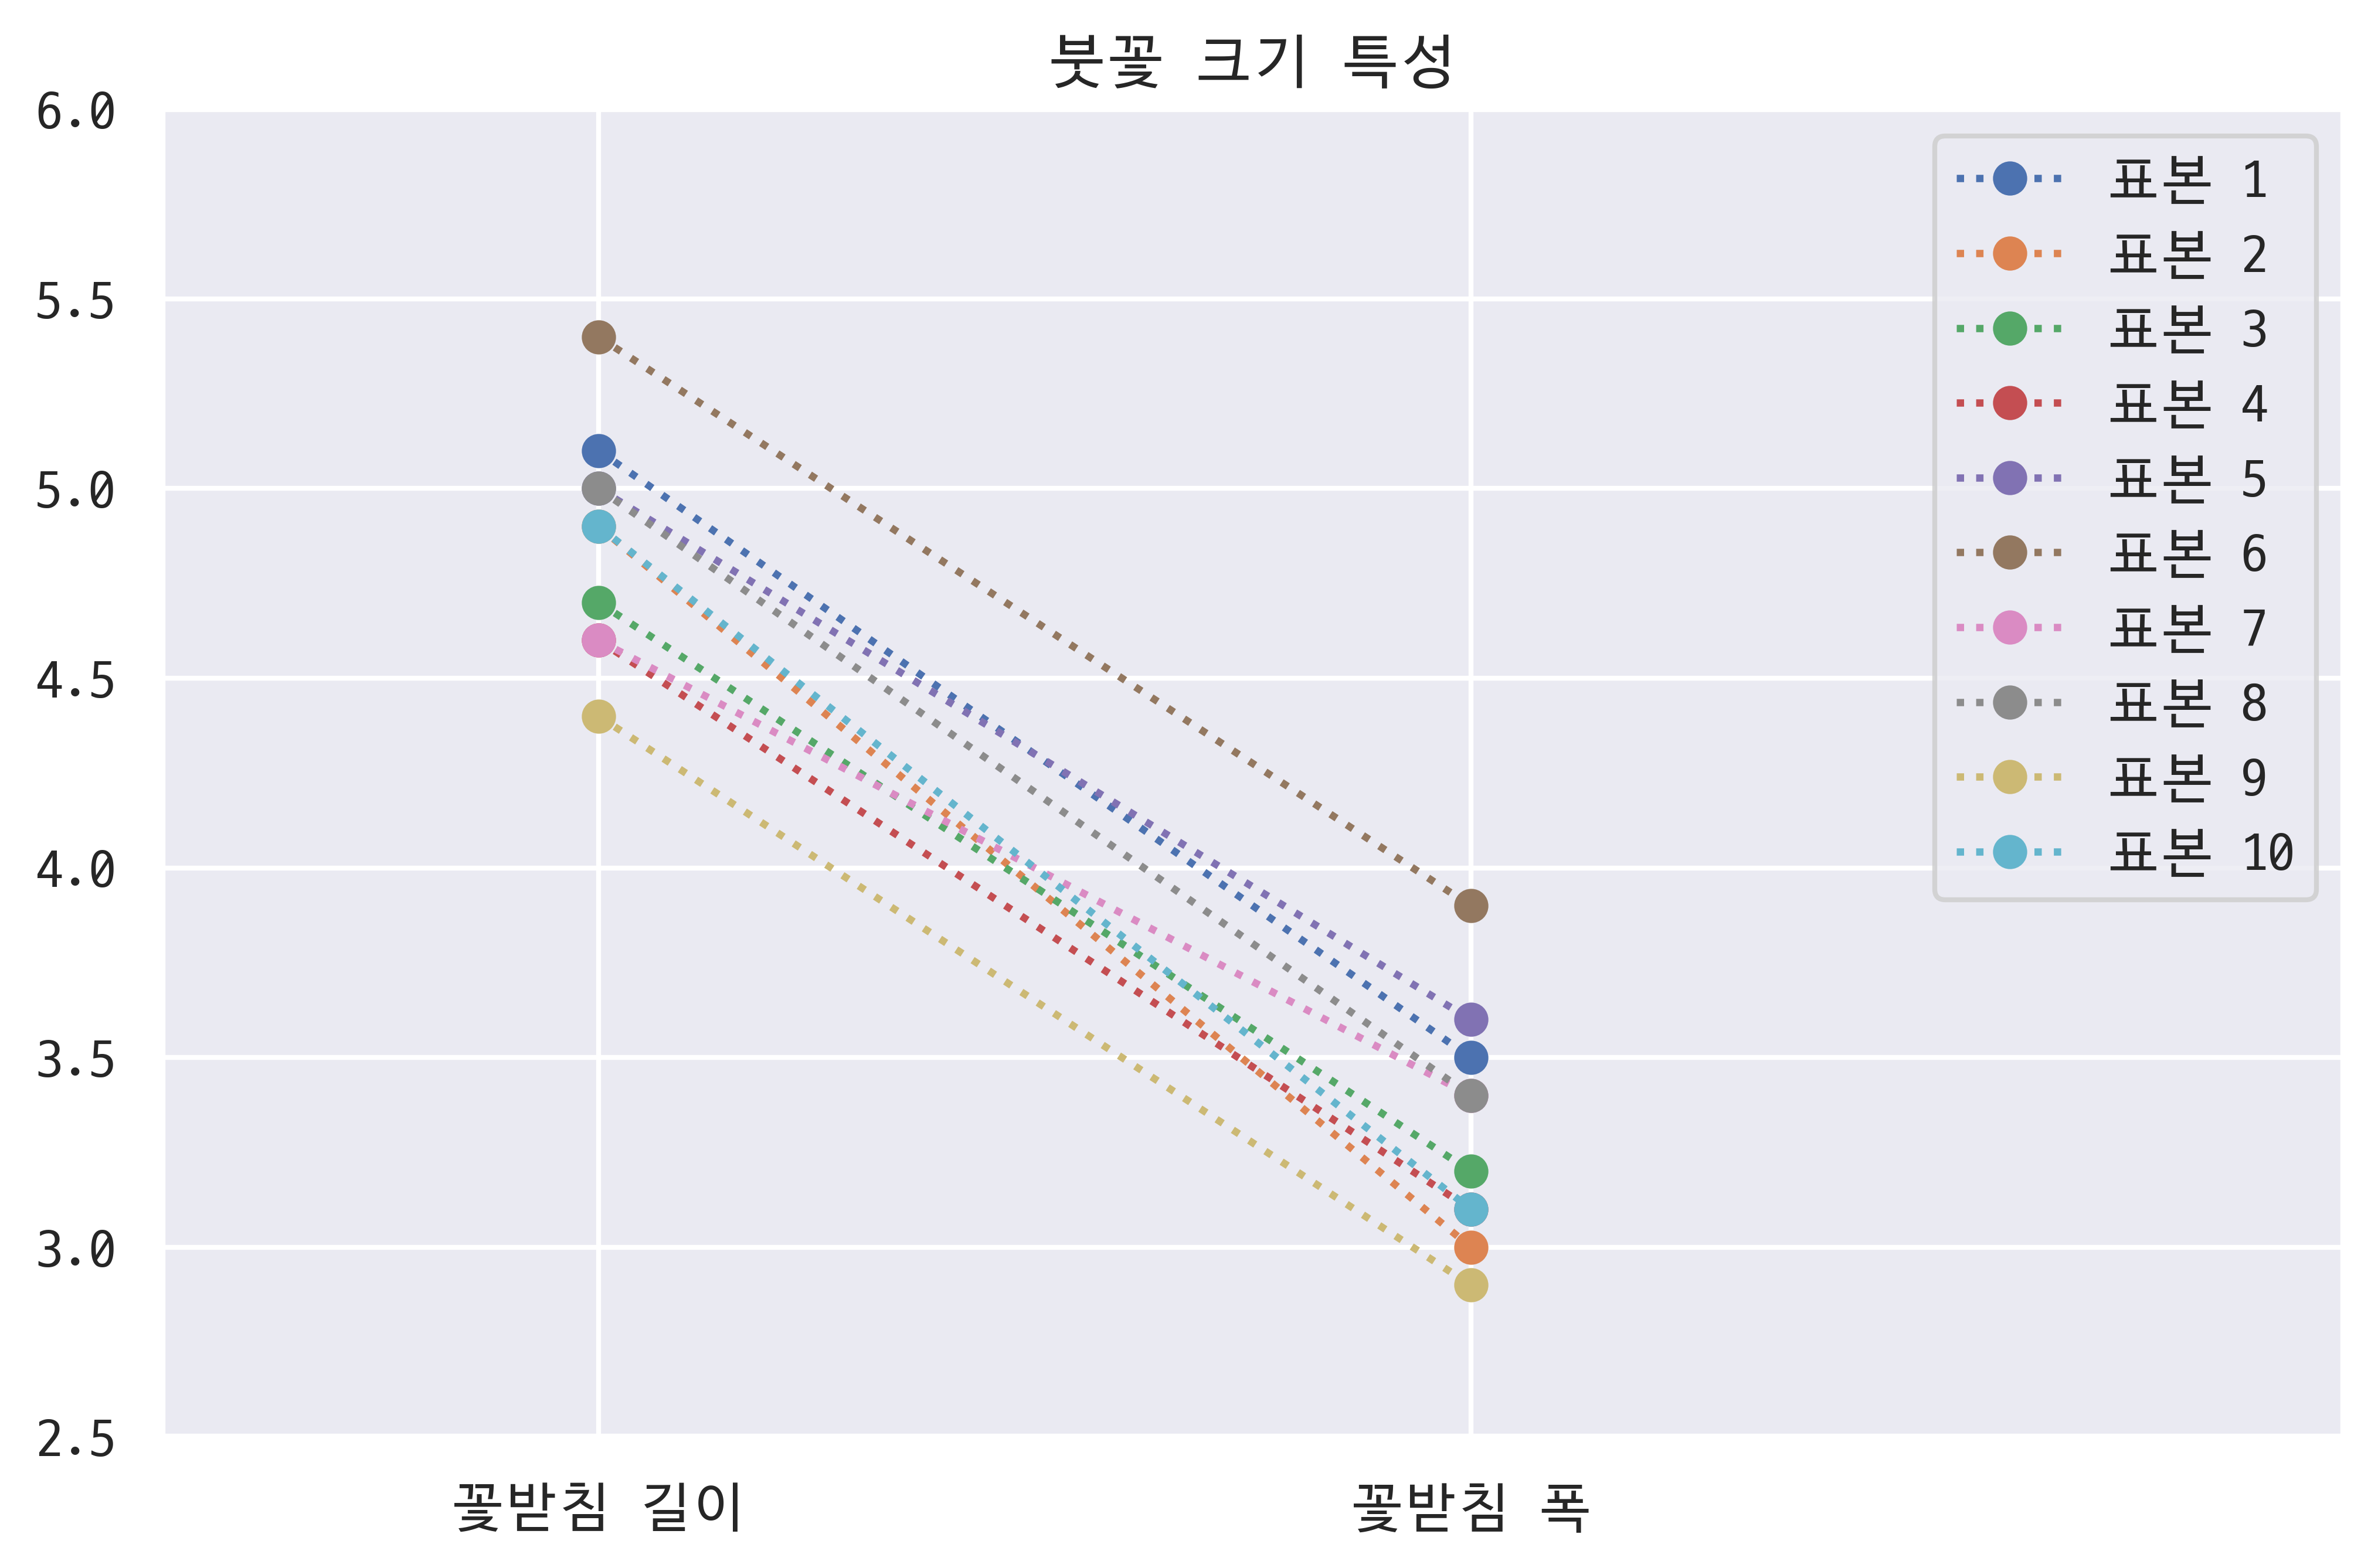

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10
X = iris.data[:N, :2]

plt.plot(X.T, 'o:')
plt.xticks(range(4), ["꽃받침 길이", "꽃받침 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("붓꽃 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(N)])
plt.show()

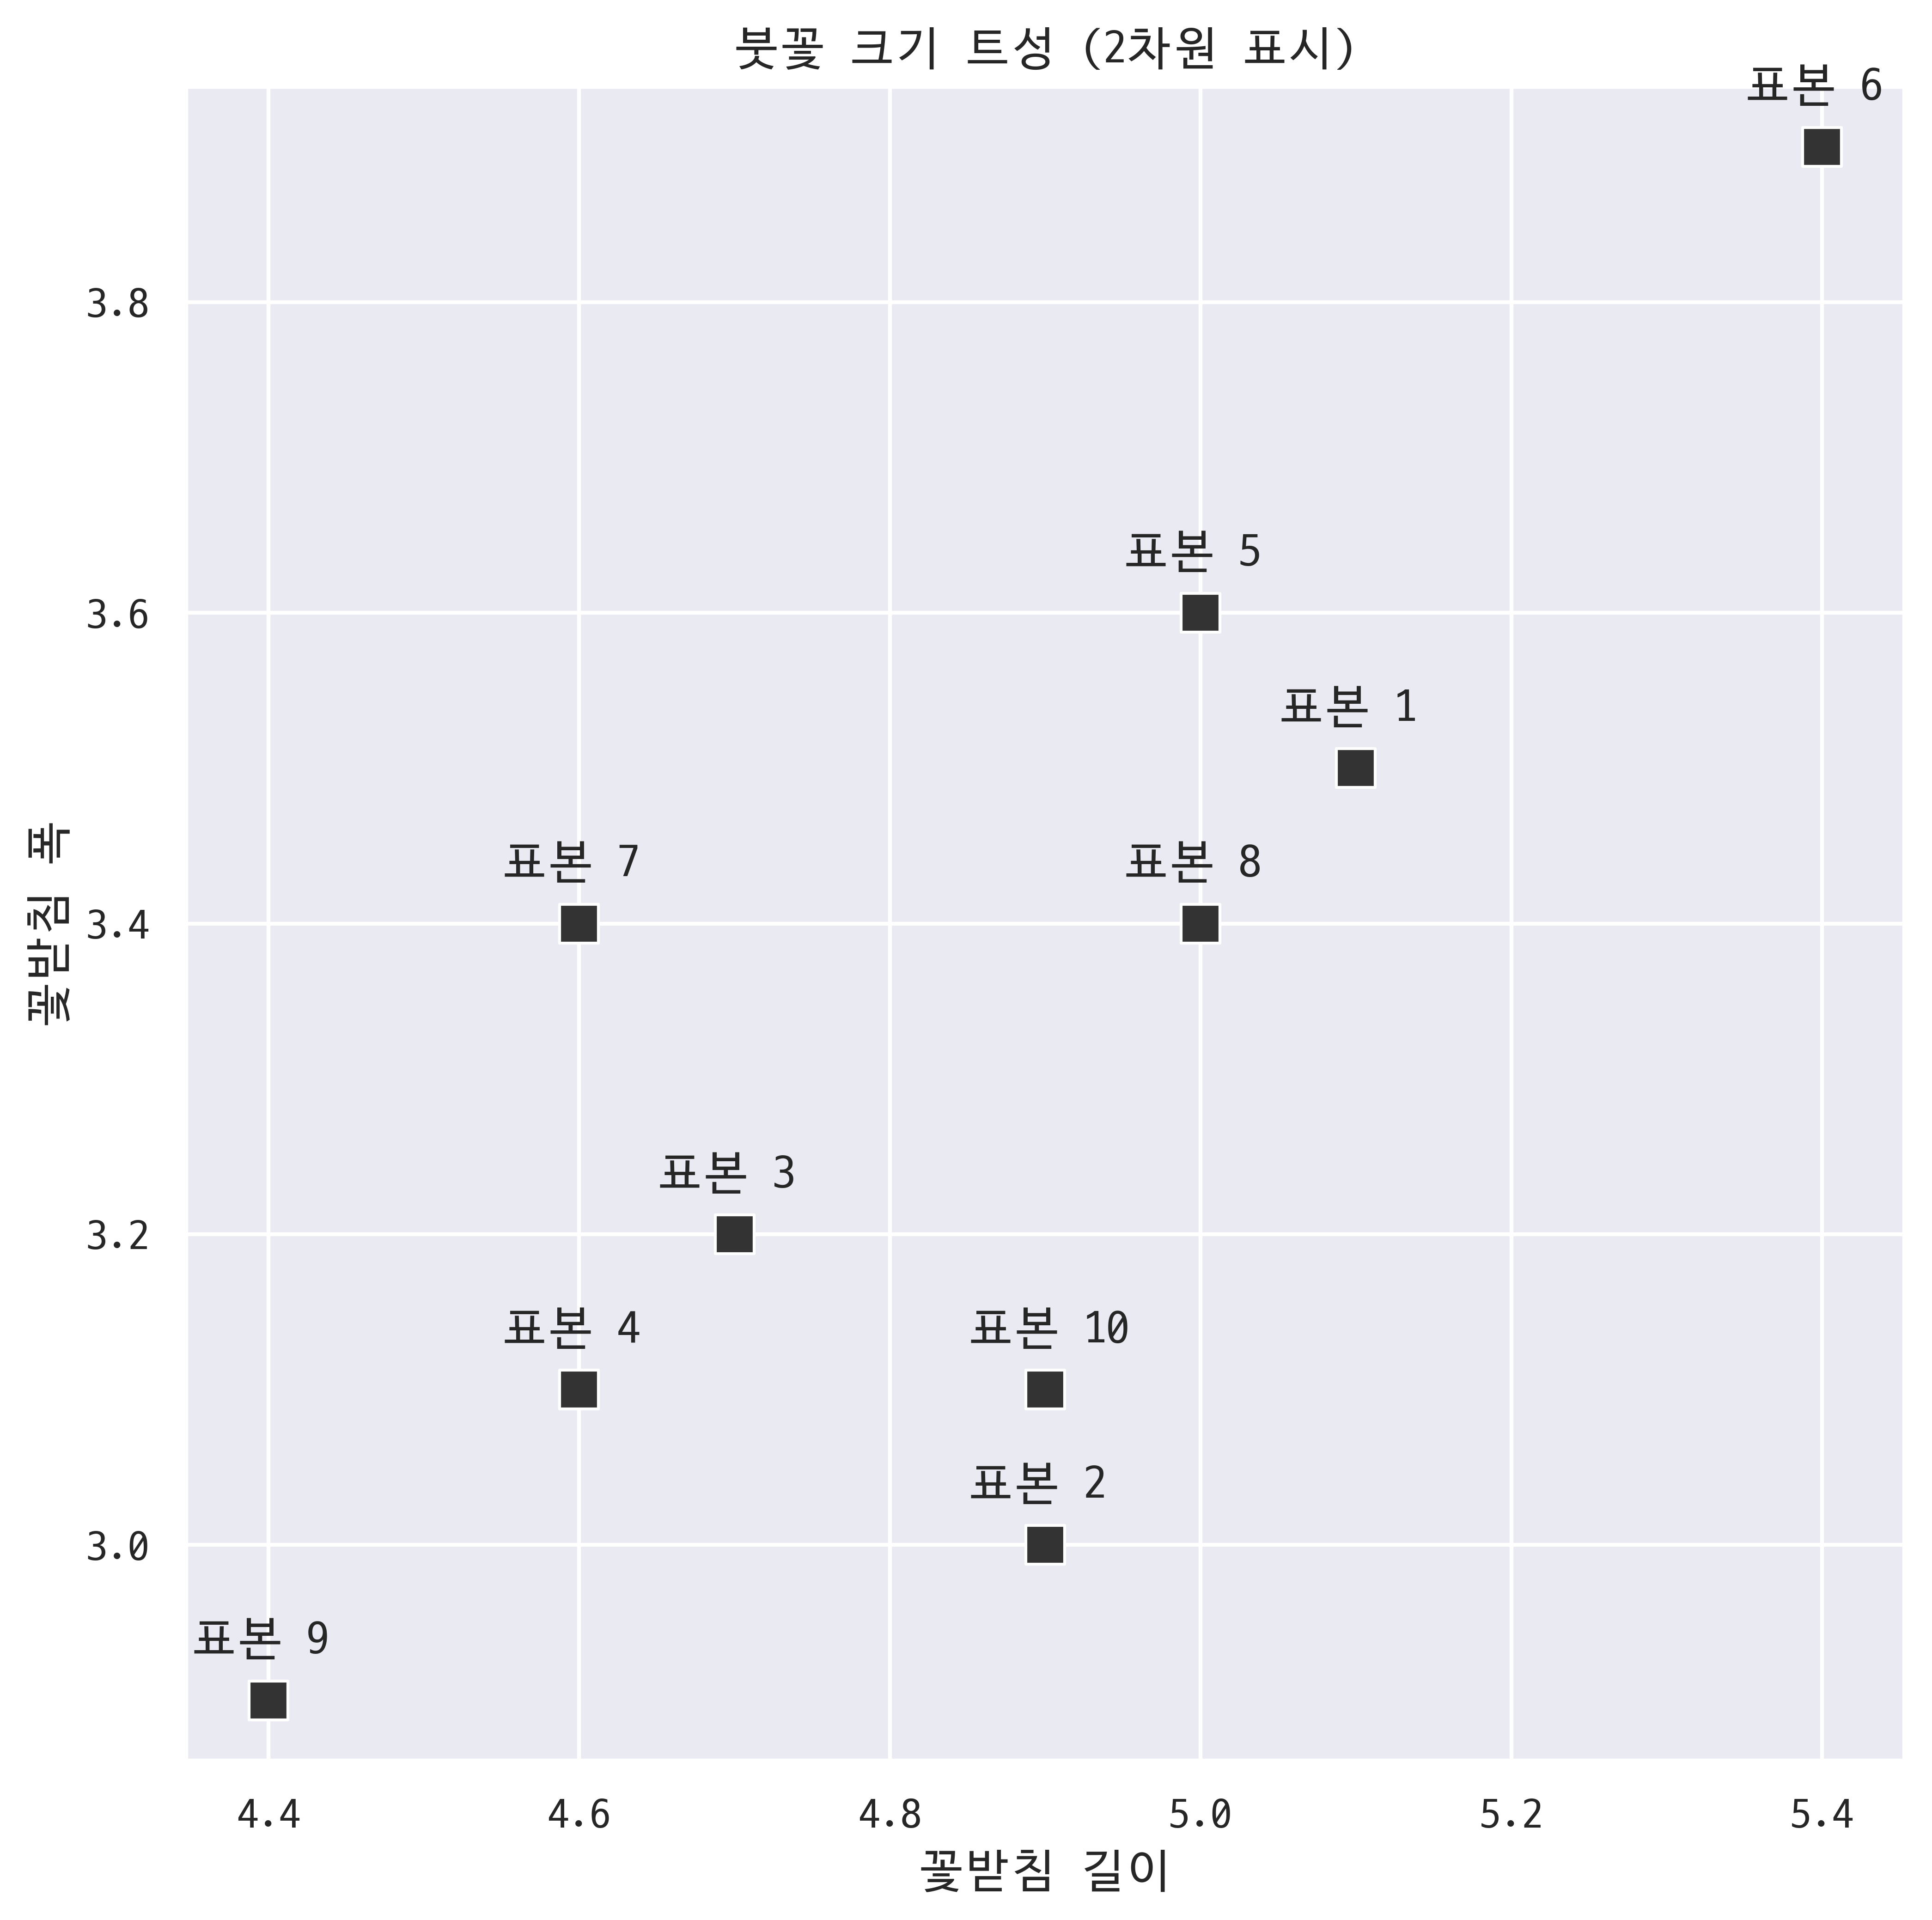

In [31]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "표본 {}".format(i + 1))
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 크기 트성 (2차원 표시)")
plt.axis("equal")
plt.show()

#### 사이킷런의 pca 기능

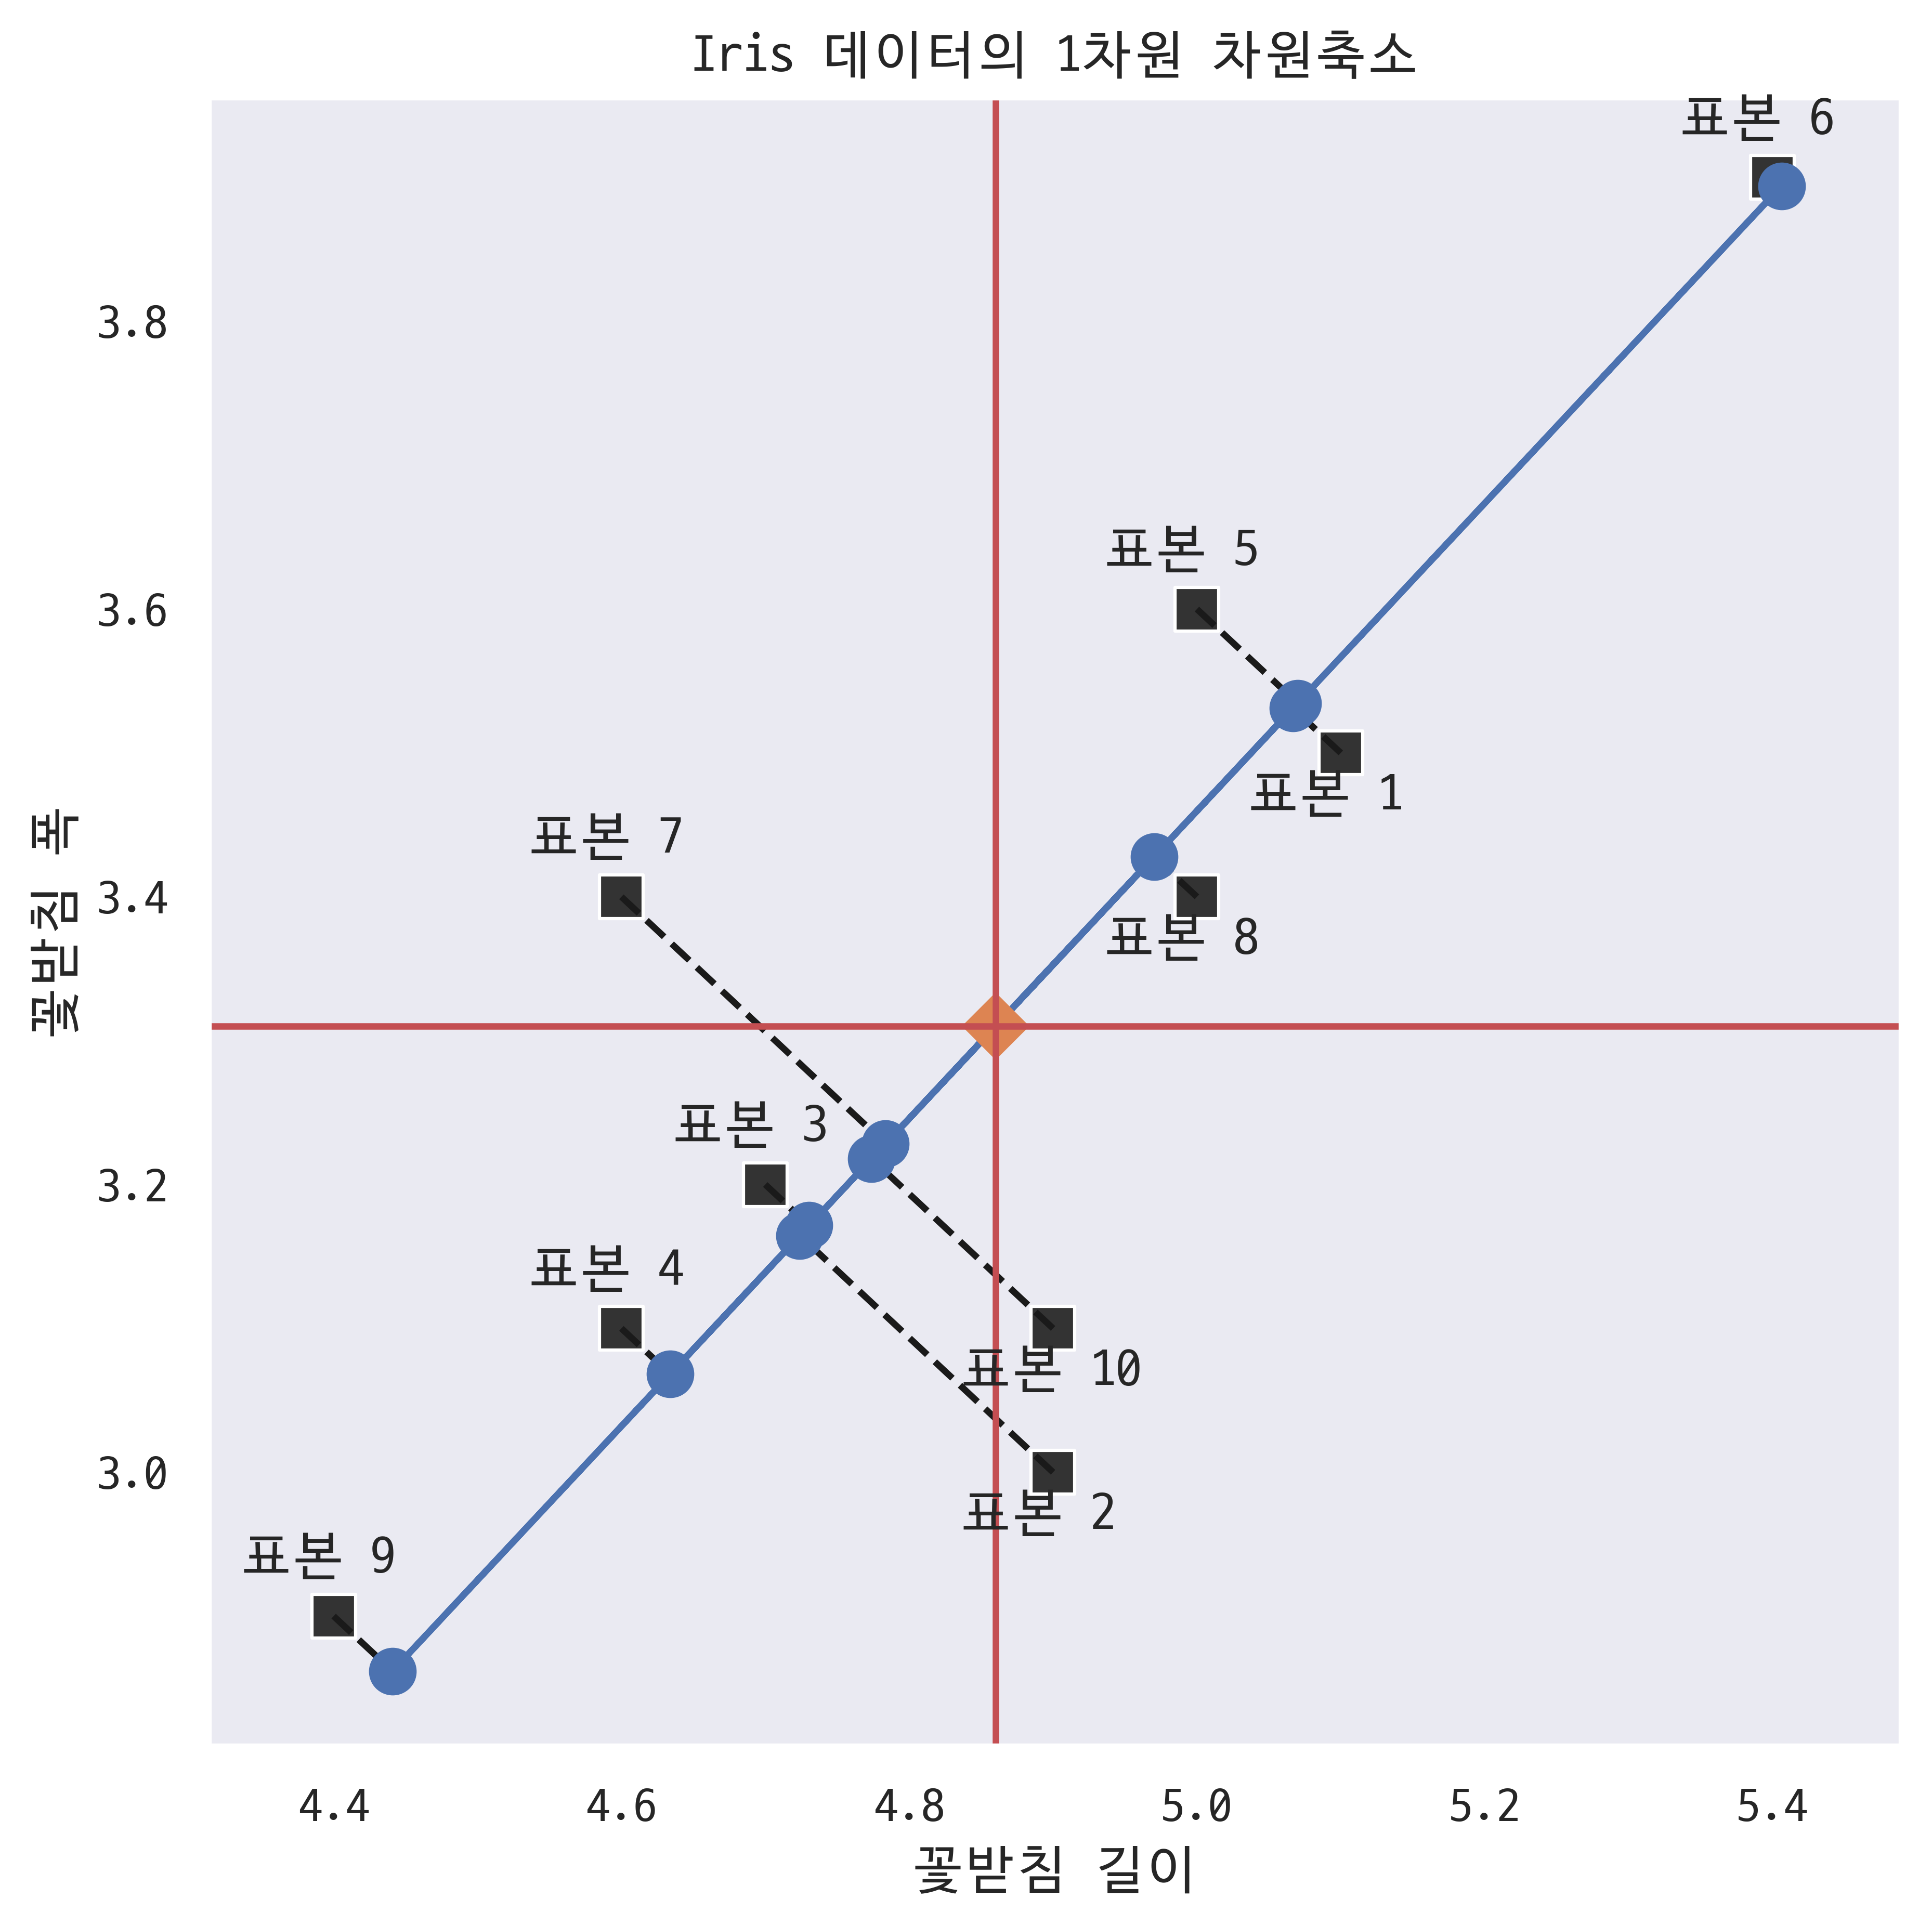

In [4]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", ms=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), ms=10, marker="D")
plt.axvline(X[:, 0].mean(), c="r")
plt.axhline(X[:, 1].mean(), c="r")
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

##### 주성분 분석 (PCA)

In [6]:
X    # 오리지널 데이터 (검은색 점)

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [7]:
X_low    # 잠재변수 (표본의 중간에 있는 원점과 표본의 투영벡터 간의 거리 - 단, 원래 차원에서의 위치는 알 수 없다)

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

In [8]:
X2    # 역변환행렬 적용 후 (파란색 점)

array([[5.06676112, 3.53108532],
       [4.7240094 , 3.1645881 ],
       [4.73047393, 3.17150049],
       [4.63393012, 3.06826822],
       [5.06999338, 3.53454152],
       [5.40628057, 3.89412635],
       [4.78359423, 3.22830091],
       [4.97021731, 3.42785306],
       [4.44084251, 2.86180369],
       [4.77389743, 3.21793233]])

In [10]:
pca1.mean_

array([4.86, 3.31])

In [36]:
pca1.components_

array([[0.68305029, 0.73037134]])

##### 특잇값 분해와의 관계

In [12]:
X0 = X -X.mean(axis=0)
U, S, VT = np.linalg.svd(X0)
VT

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [14]:
VT[:, 0]

array([-0.68305029, -0.73037134])

##### 고유 분해와의 관계

In [16]:
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)

In [17]:
W

array([0.17107711, 1.44192289])

In [18]:
V

array([[-0.73037134, -0.68305029],
       [ 0.68305029, -0.73037134]])

In [19]:
V[:, np.argmax(W)]

array([-0.68305029, -0.73037134])

##### 8번째 꽃 예시

In [20]:
X[7, :]    # 8번째 꽃의 꽃받침 길이와 꽃받침 폭

array([5. , 3.4])

In [21]:
X_low[7]    # PCA로 구한 주성분의 값 (꽃의 크기)

array([0.16136046])

In [22]:
pca1.components_ @ (X[7, :] - pca1.mean_)    # 평균을 제거하고 기저벡터에 투영한 결과

array([0.16136046])

In [23]:
X2[7, :]    # 주성분의 값을 이용하여 다시 2차원 값으로 나타낸 근사값

array([4.97021731, 3.42785306])

#### Ex. 3.5.1

In [50]:
N = 50
X = iris.data[:N, 2:]

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

In [54]:
pca1.mean_, pca1.components_

(array([1.462, 0.246]), array([[0.96004653, 0.27984043]]))

In [55]:
N = 50
X = iris.data[:N]

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

In [56]:
pca1.mean_, pca1.components_

(array([5.006, 3.428, 1.462, 0.246]),
 array([[0.6690784 , 0.73414783, 0.0965439 , 0.06356359]]))

#### 이미지 PCA

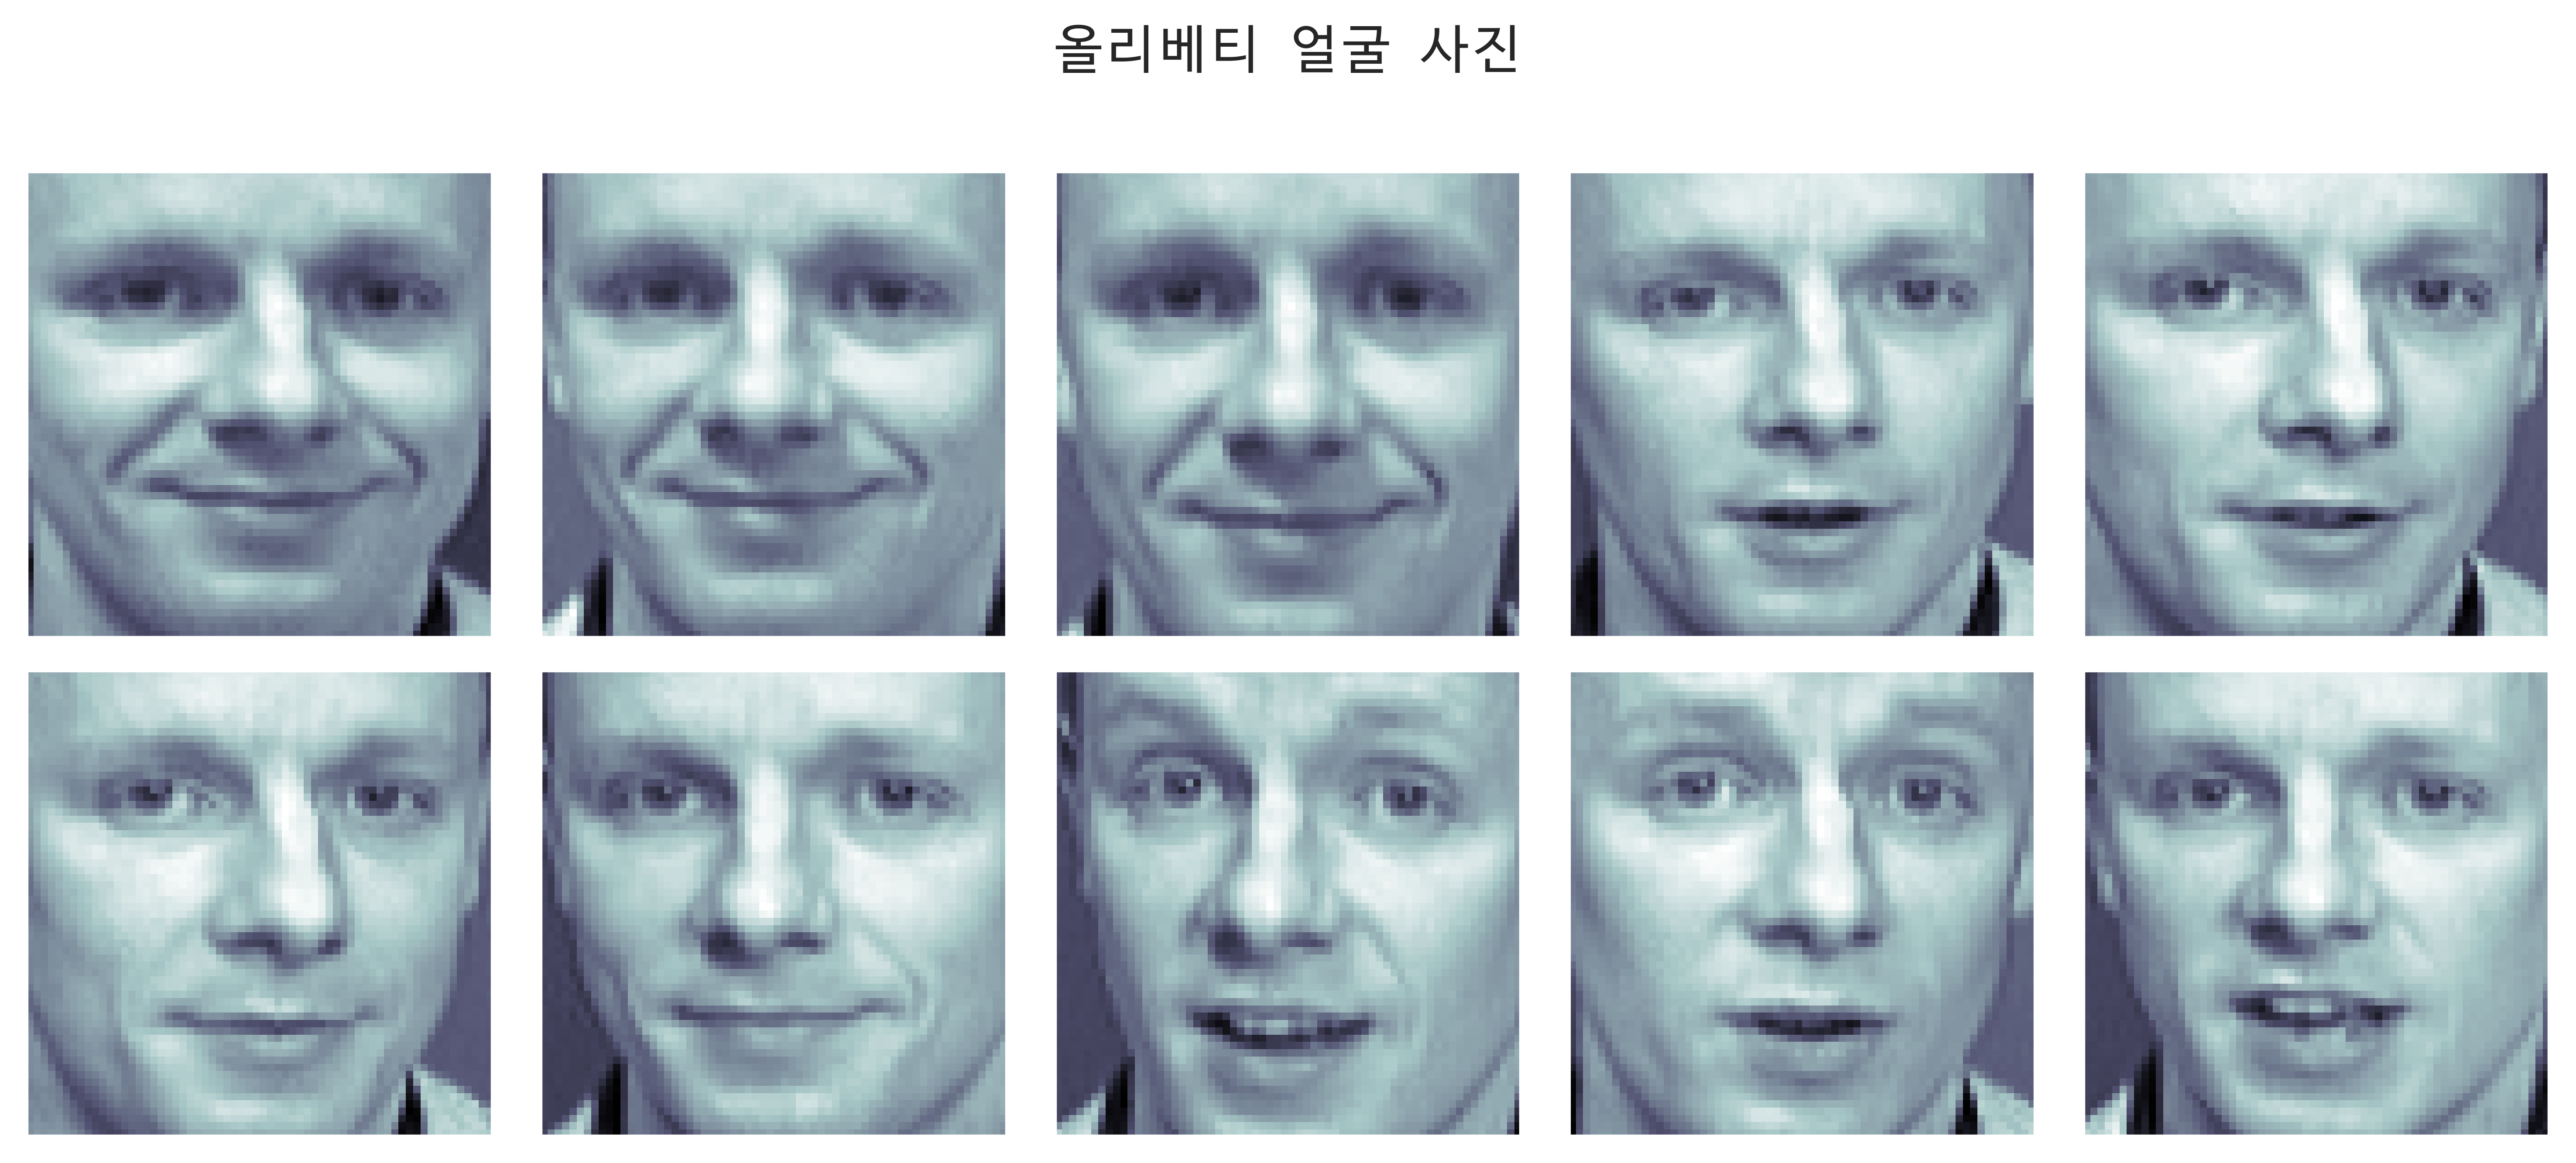

In [60]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 20
faces = faces_all.images[faces_all.target == K]
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

In [62]:
faces.shape

(10, 64, 64)

In [63]:
64 * 64    # 원본 데이터에는 4096차원 상에 벡터가 10개 존재

4096

In [64]:
# 이미지 압축 : 4096개의 숫자를 2개의 숫자로 표현하기
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

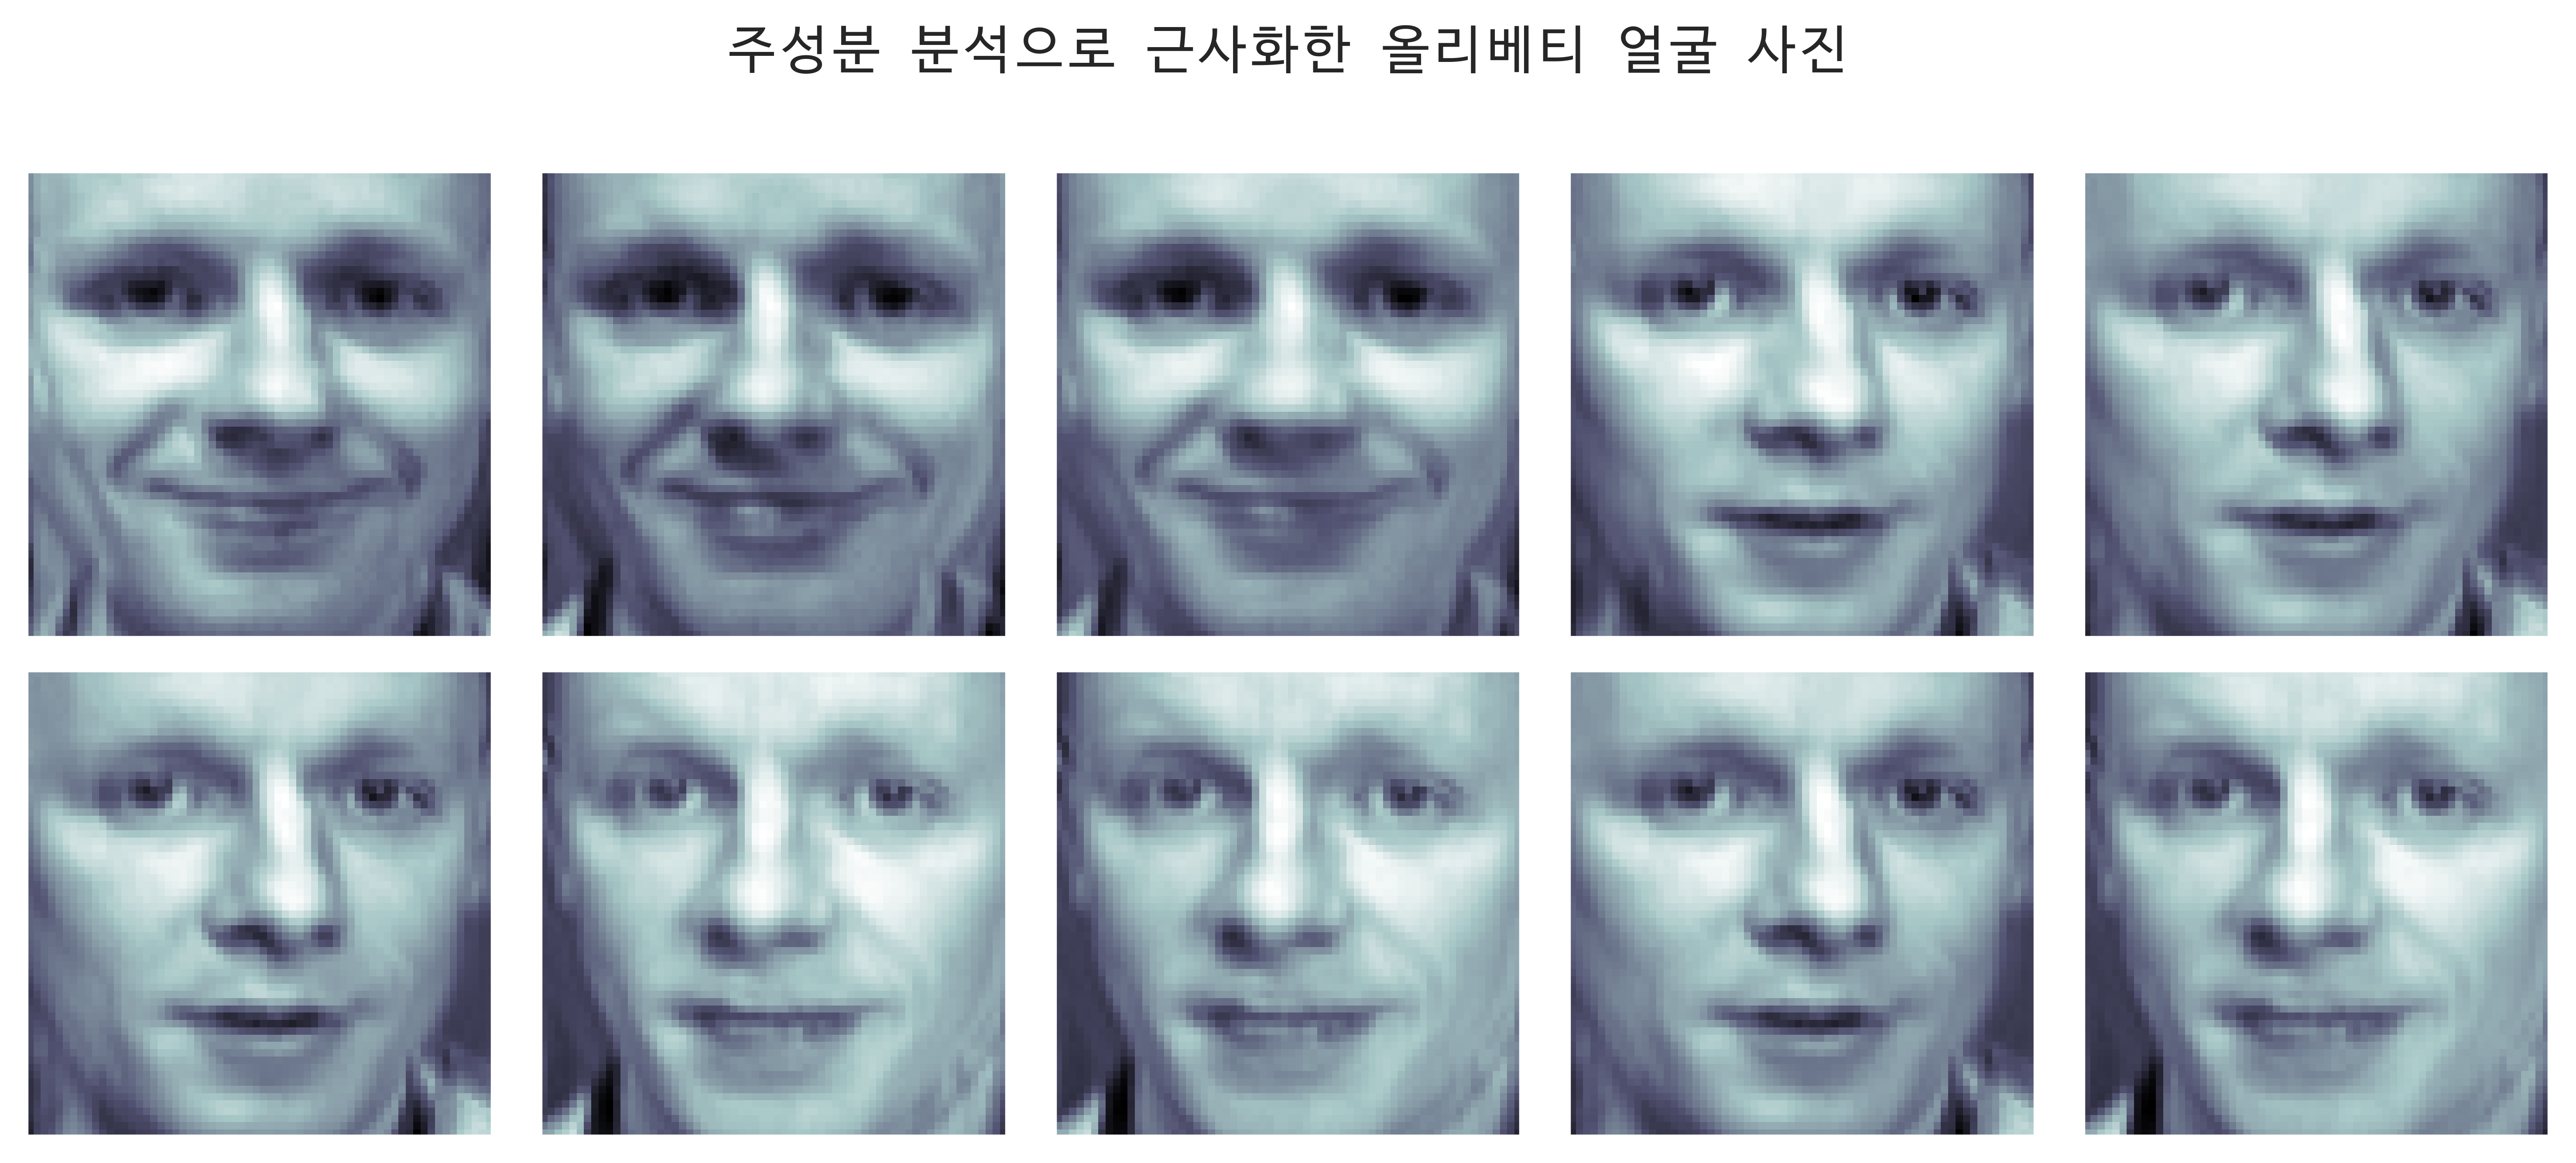

In [65]:
# Eigen Face
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

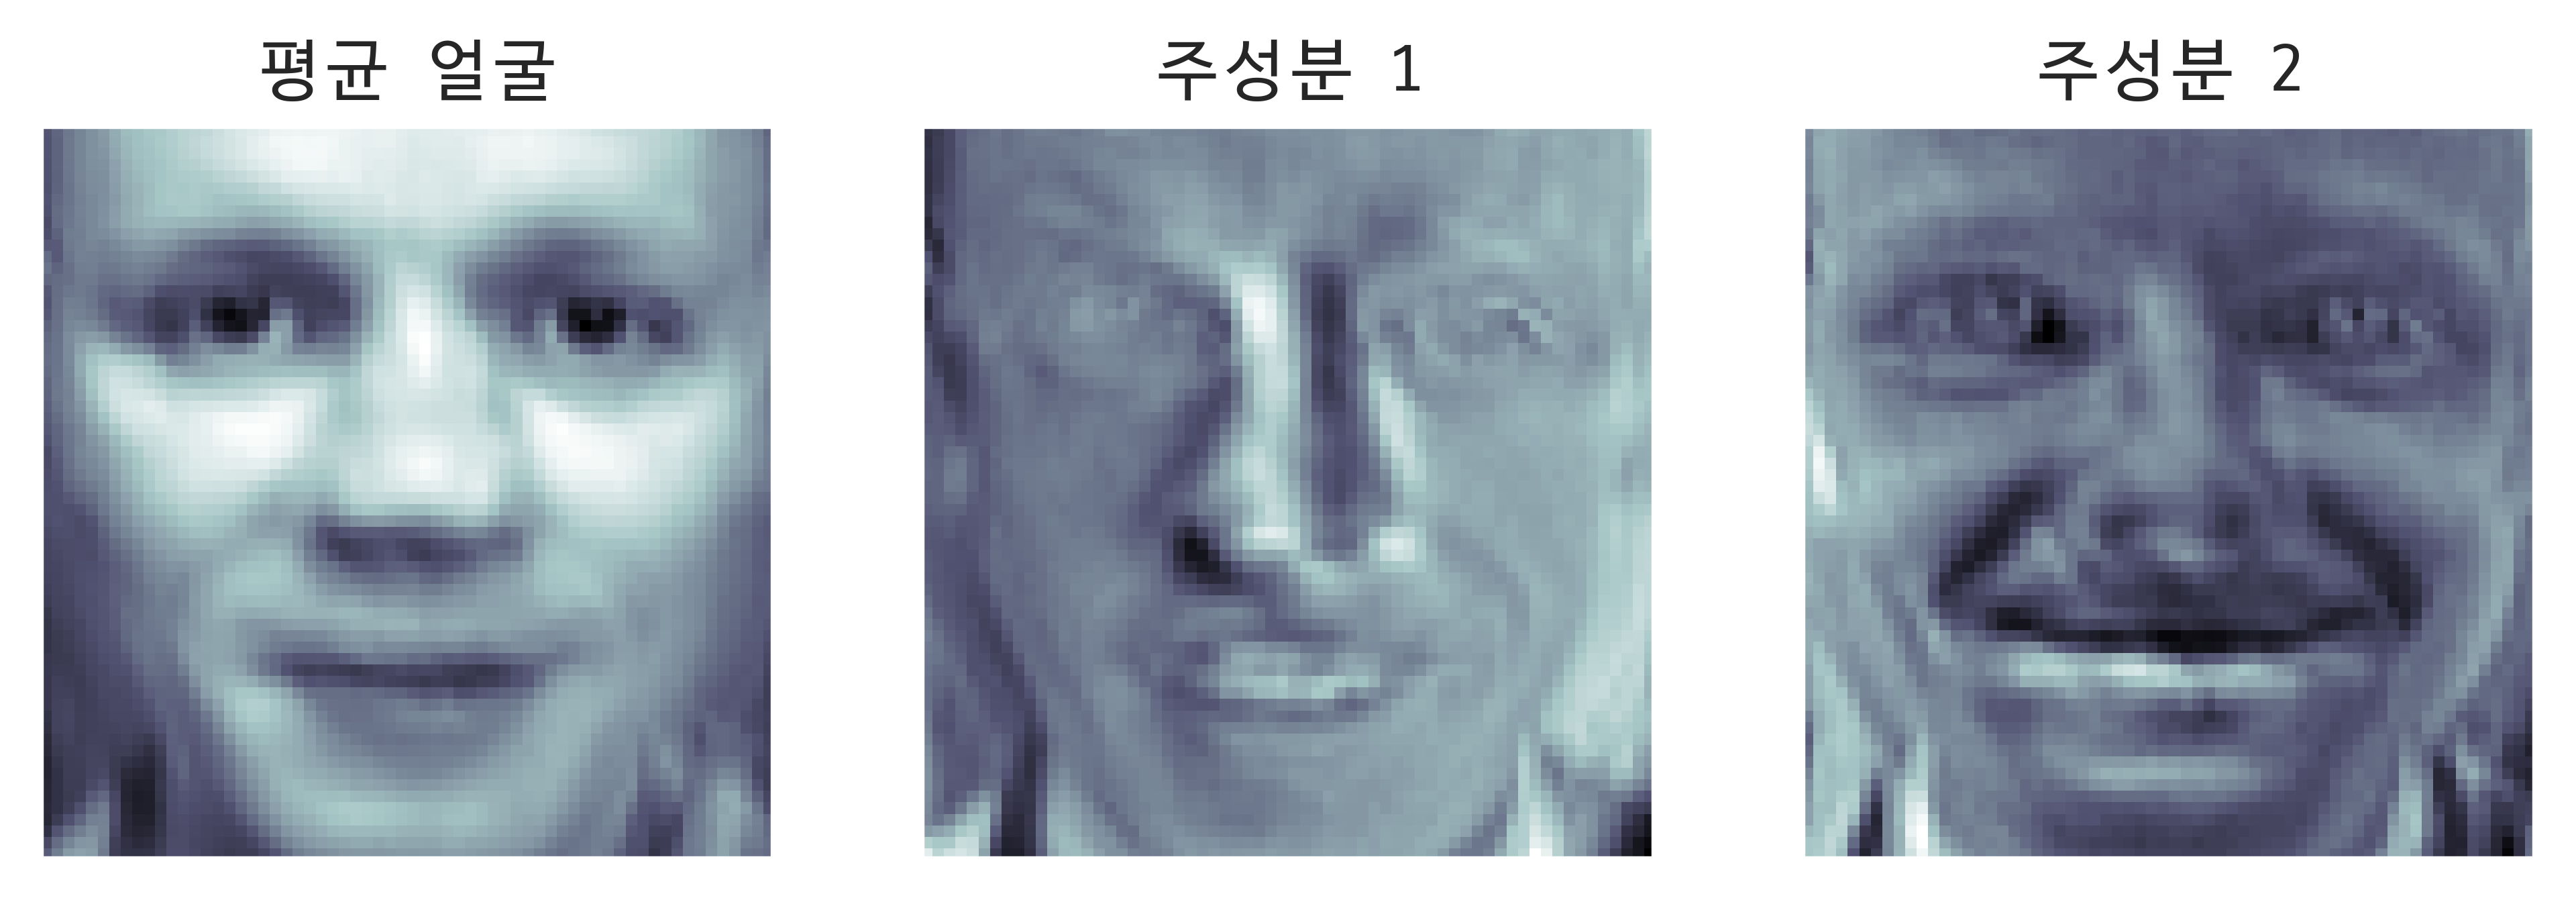

In [69]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")   # 원래 이미지(위치)가 아니라 방향을 나타내는 기저벡터이기 때문에 이미지가 이상하게 출력됨
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")    # 주성분 1에 이어 두번째로 많이 변한 방향
plt.show()

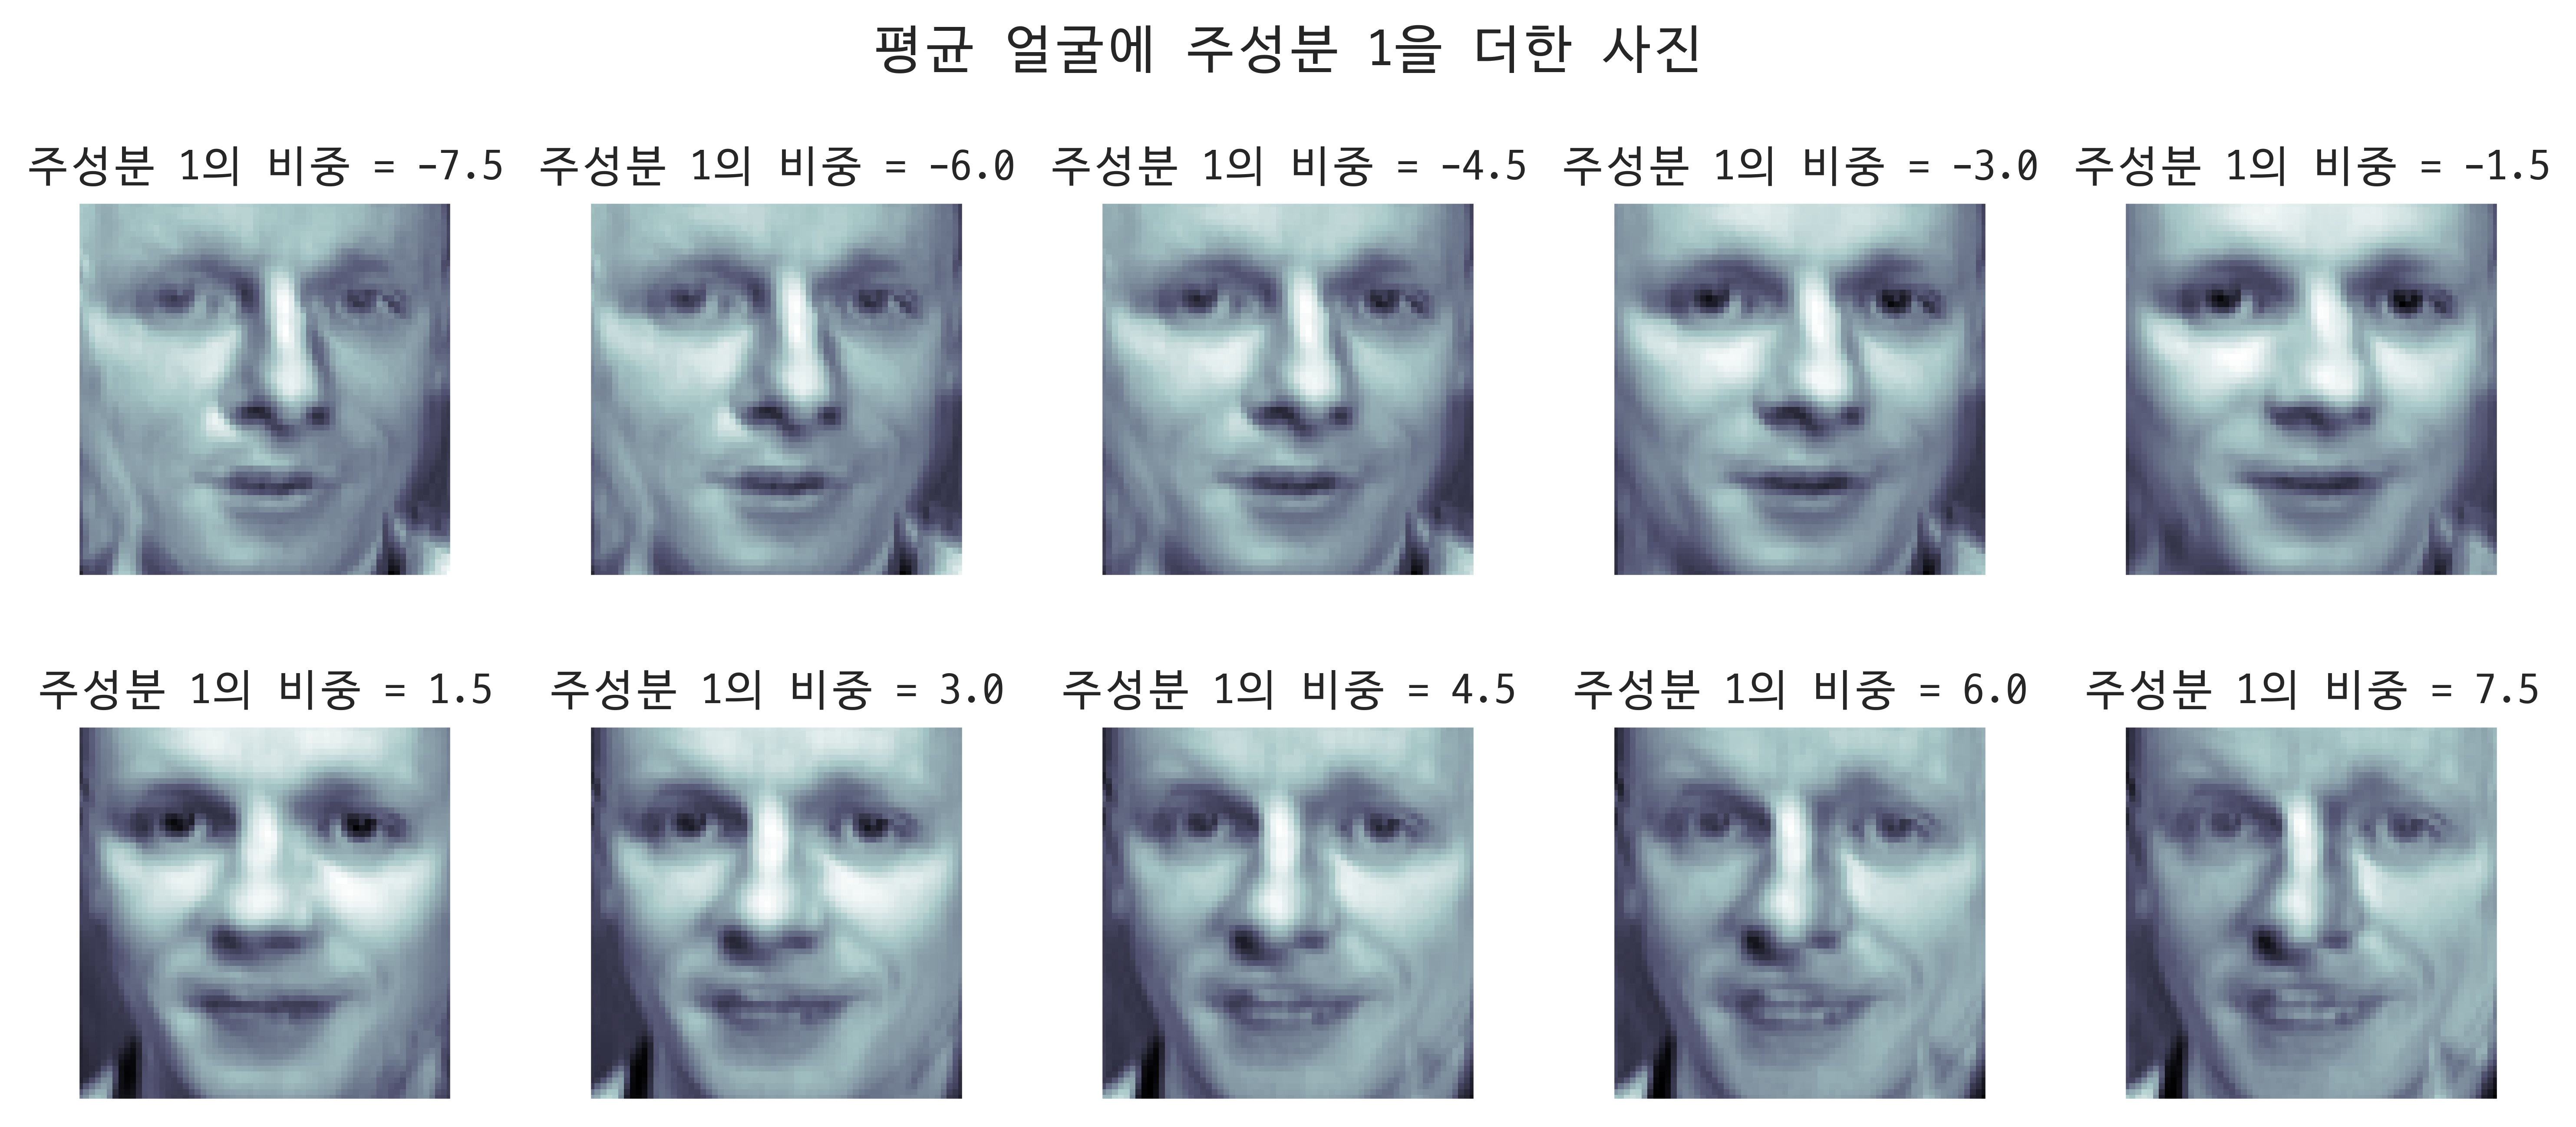

In [71]:
# 합성 이미지 만들기 1
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분 1의 비중 = {}".format(w))
plt.suptitle("평균 얼굴에 주성분 1을 더한 사진")
plt.tight_layout()
plt.show()

# Insight 1: 고개가 왼쪽, 오른쪽인 것이 가장 큰 차이다

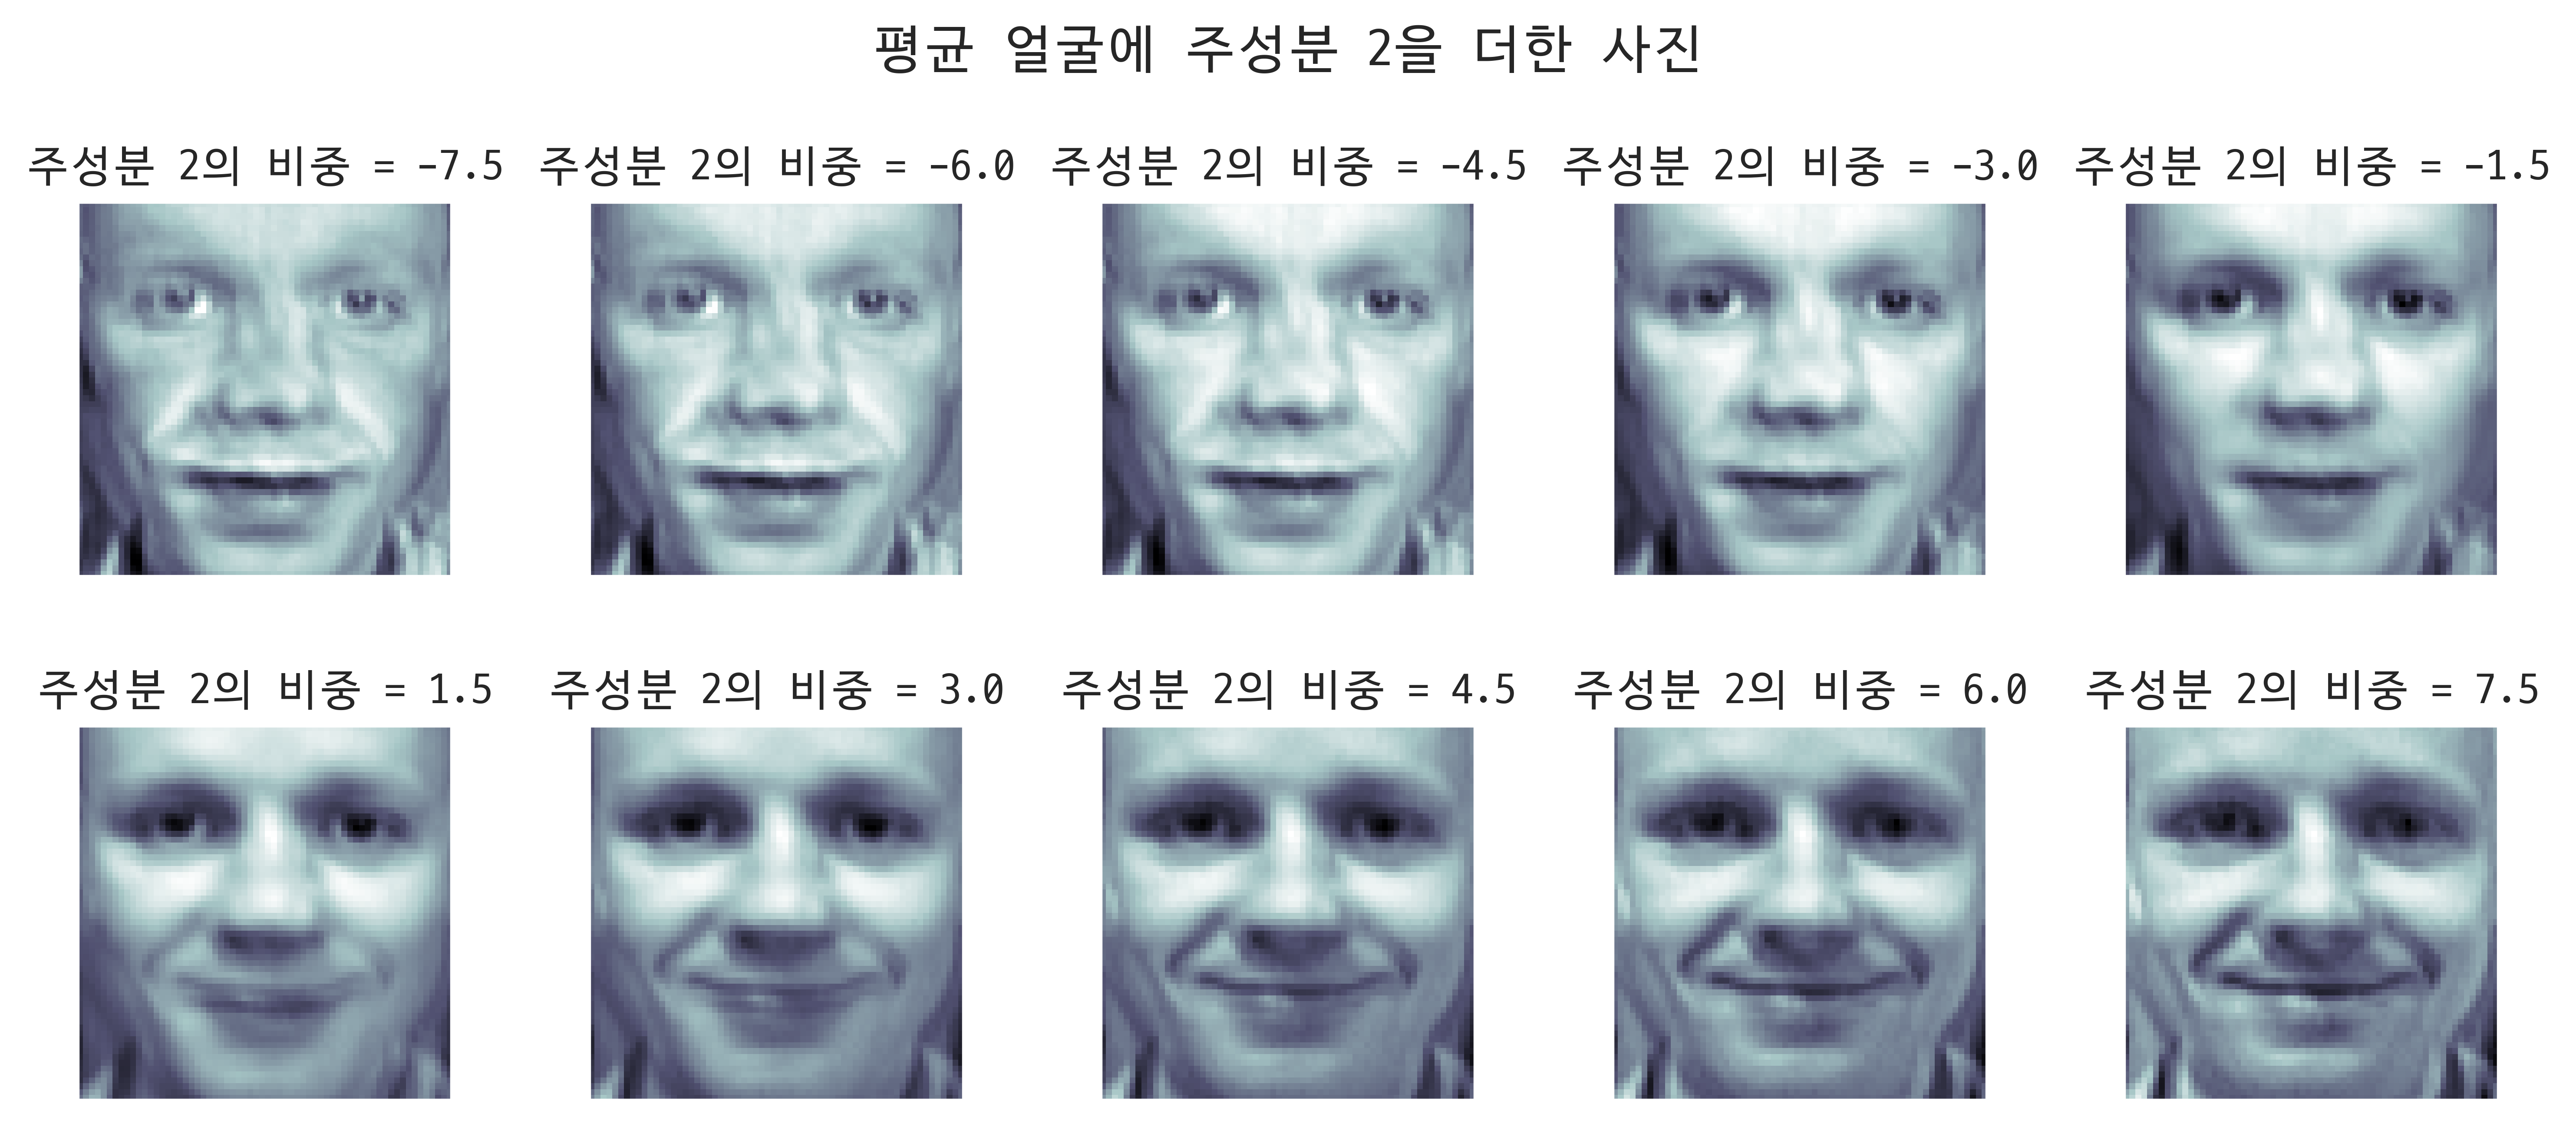

In [72]:
# 합성 이미지 만들기 2
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분 2의 비중 = {}".format(w))
plt.suptitle("평균 얼굴에 주성분 2을 더한 사진")
plt.tight_layout()
plt.show()

# Insight 2: 웃지 않는 것, 웃는 것이 그 다음으로 큰 차이다

#### Ex. 3.5.2

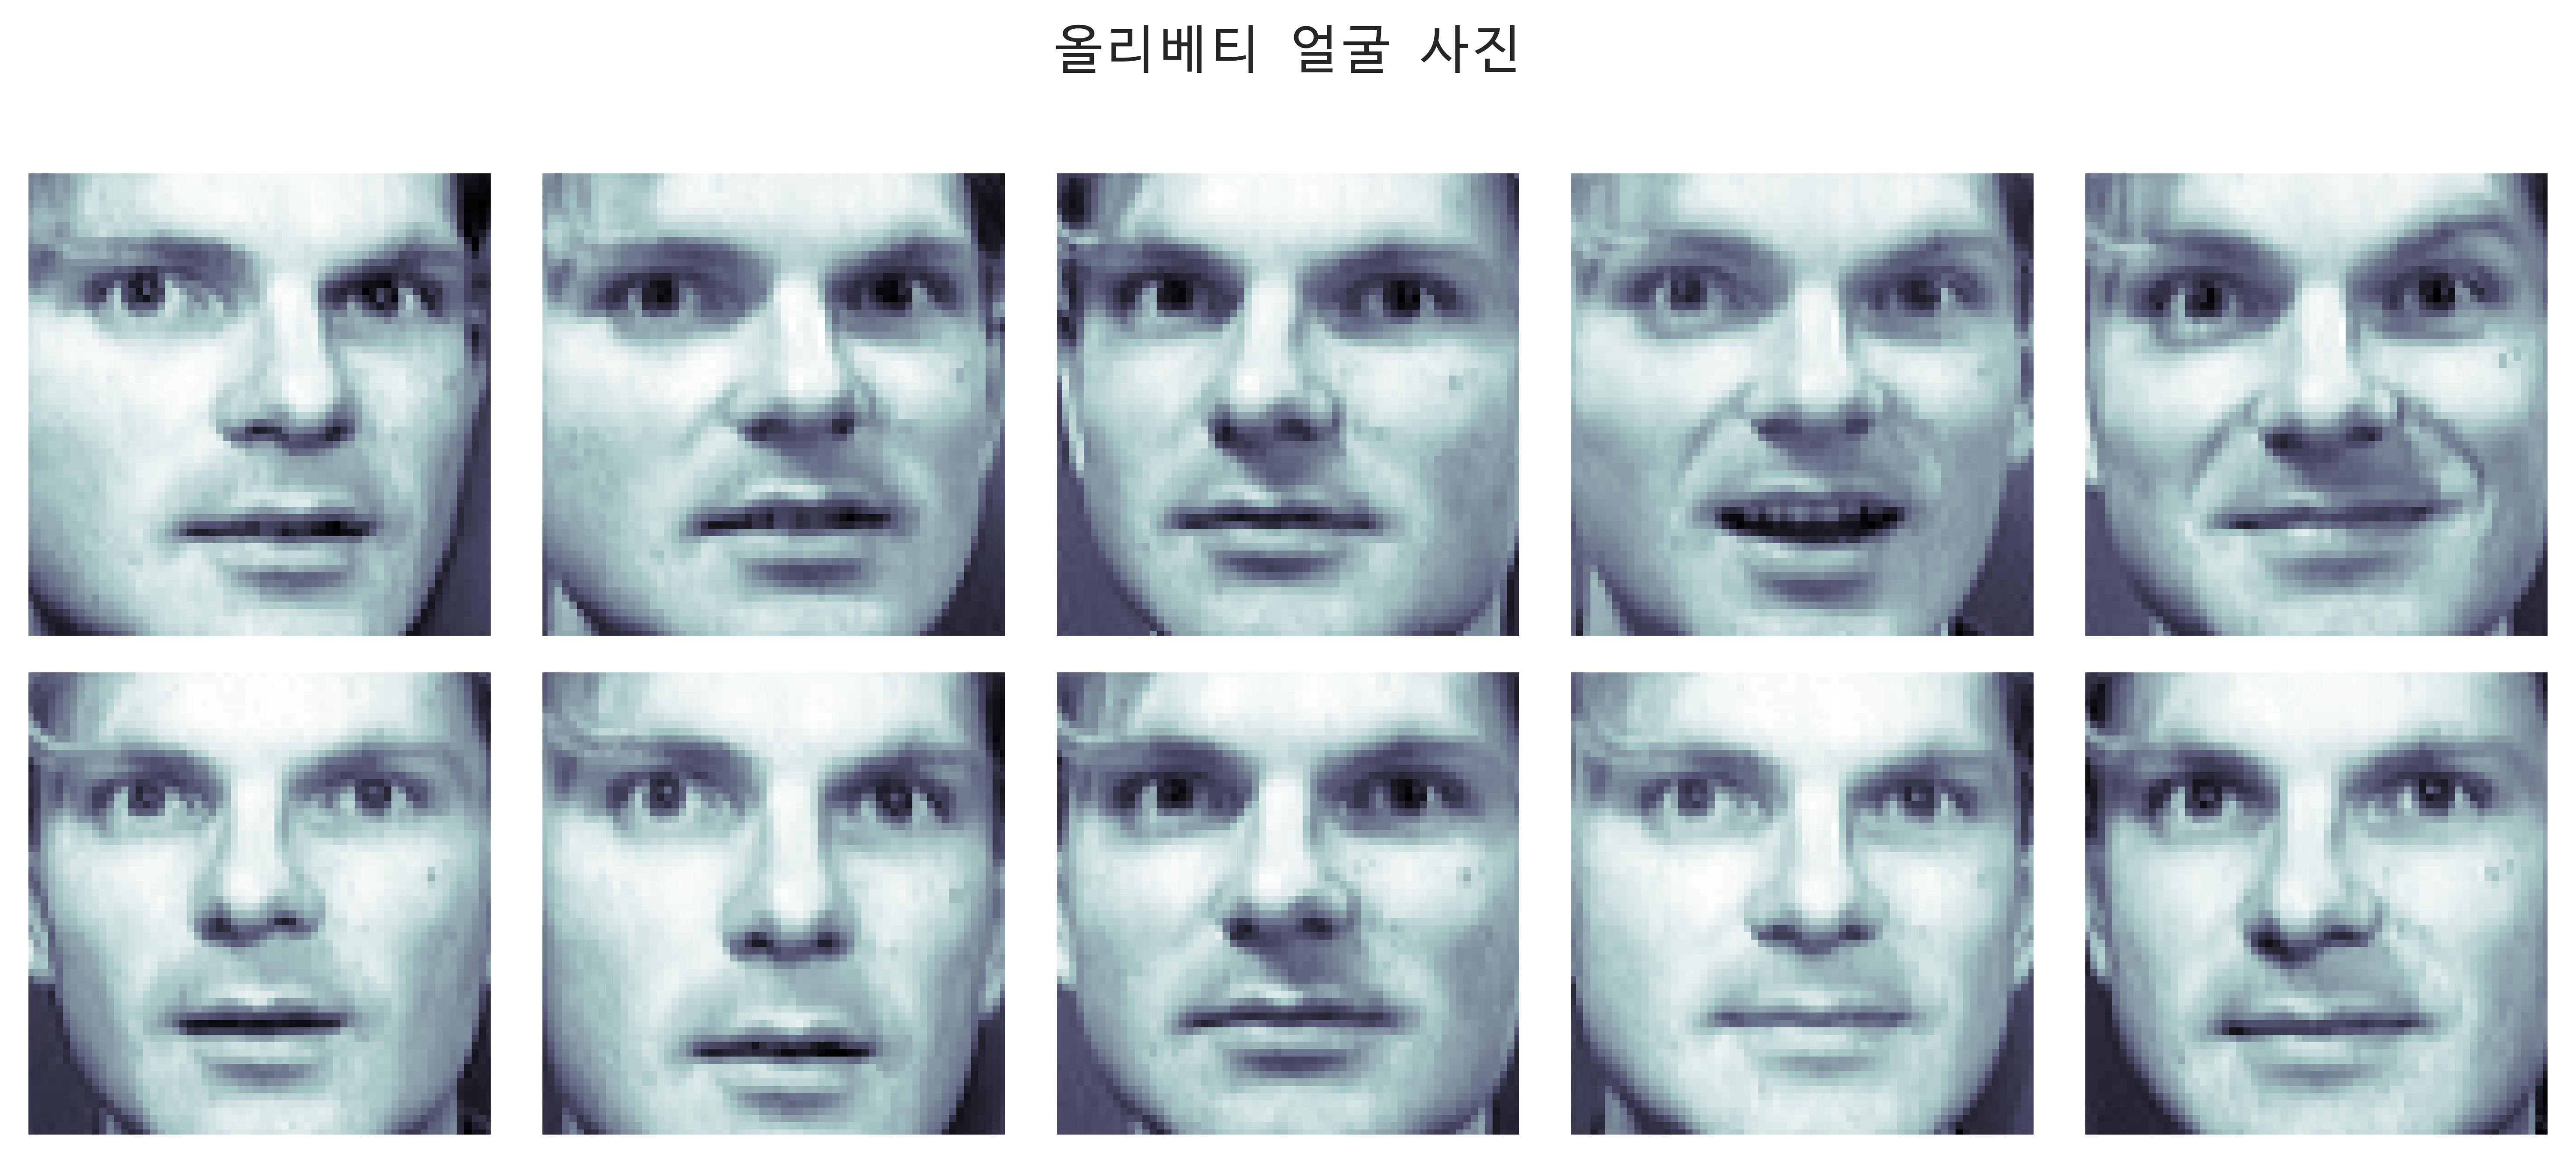

In [102]:
# 17번 사람
faces_all = fetch_olivetti_faces()
K = 17
faces = faces_all.images[faces_all.target == K]
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

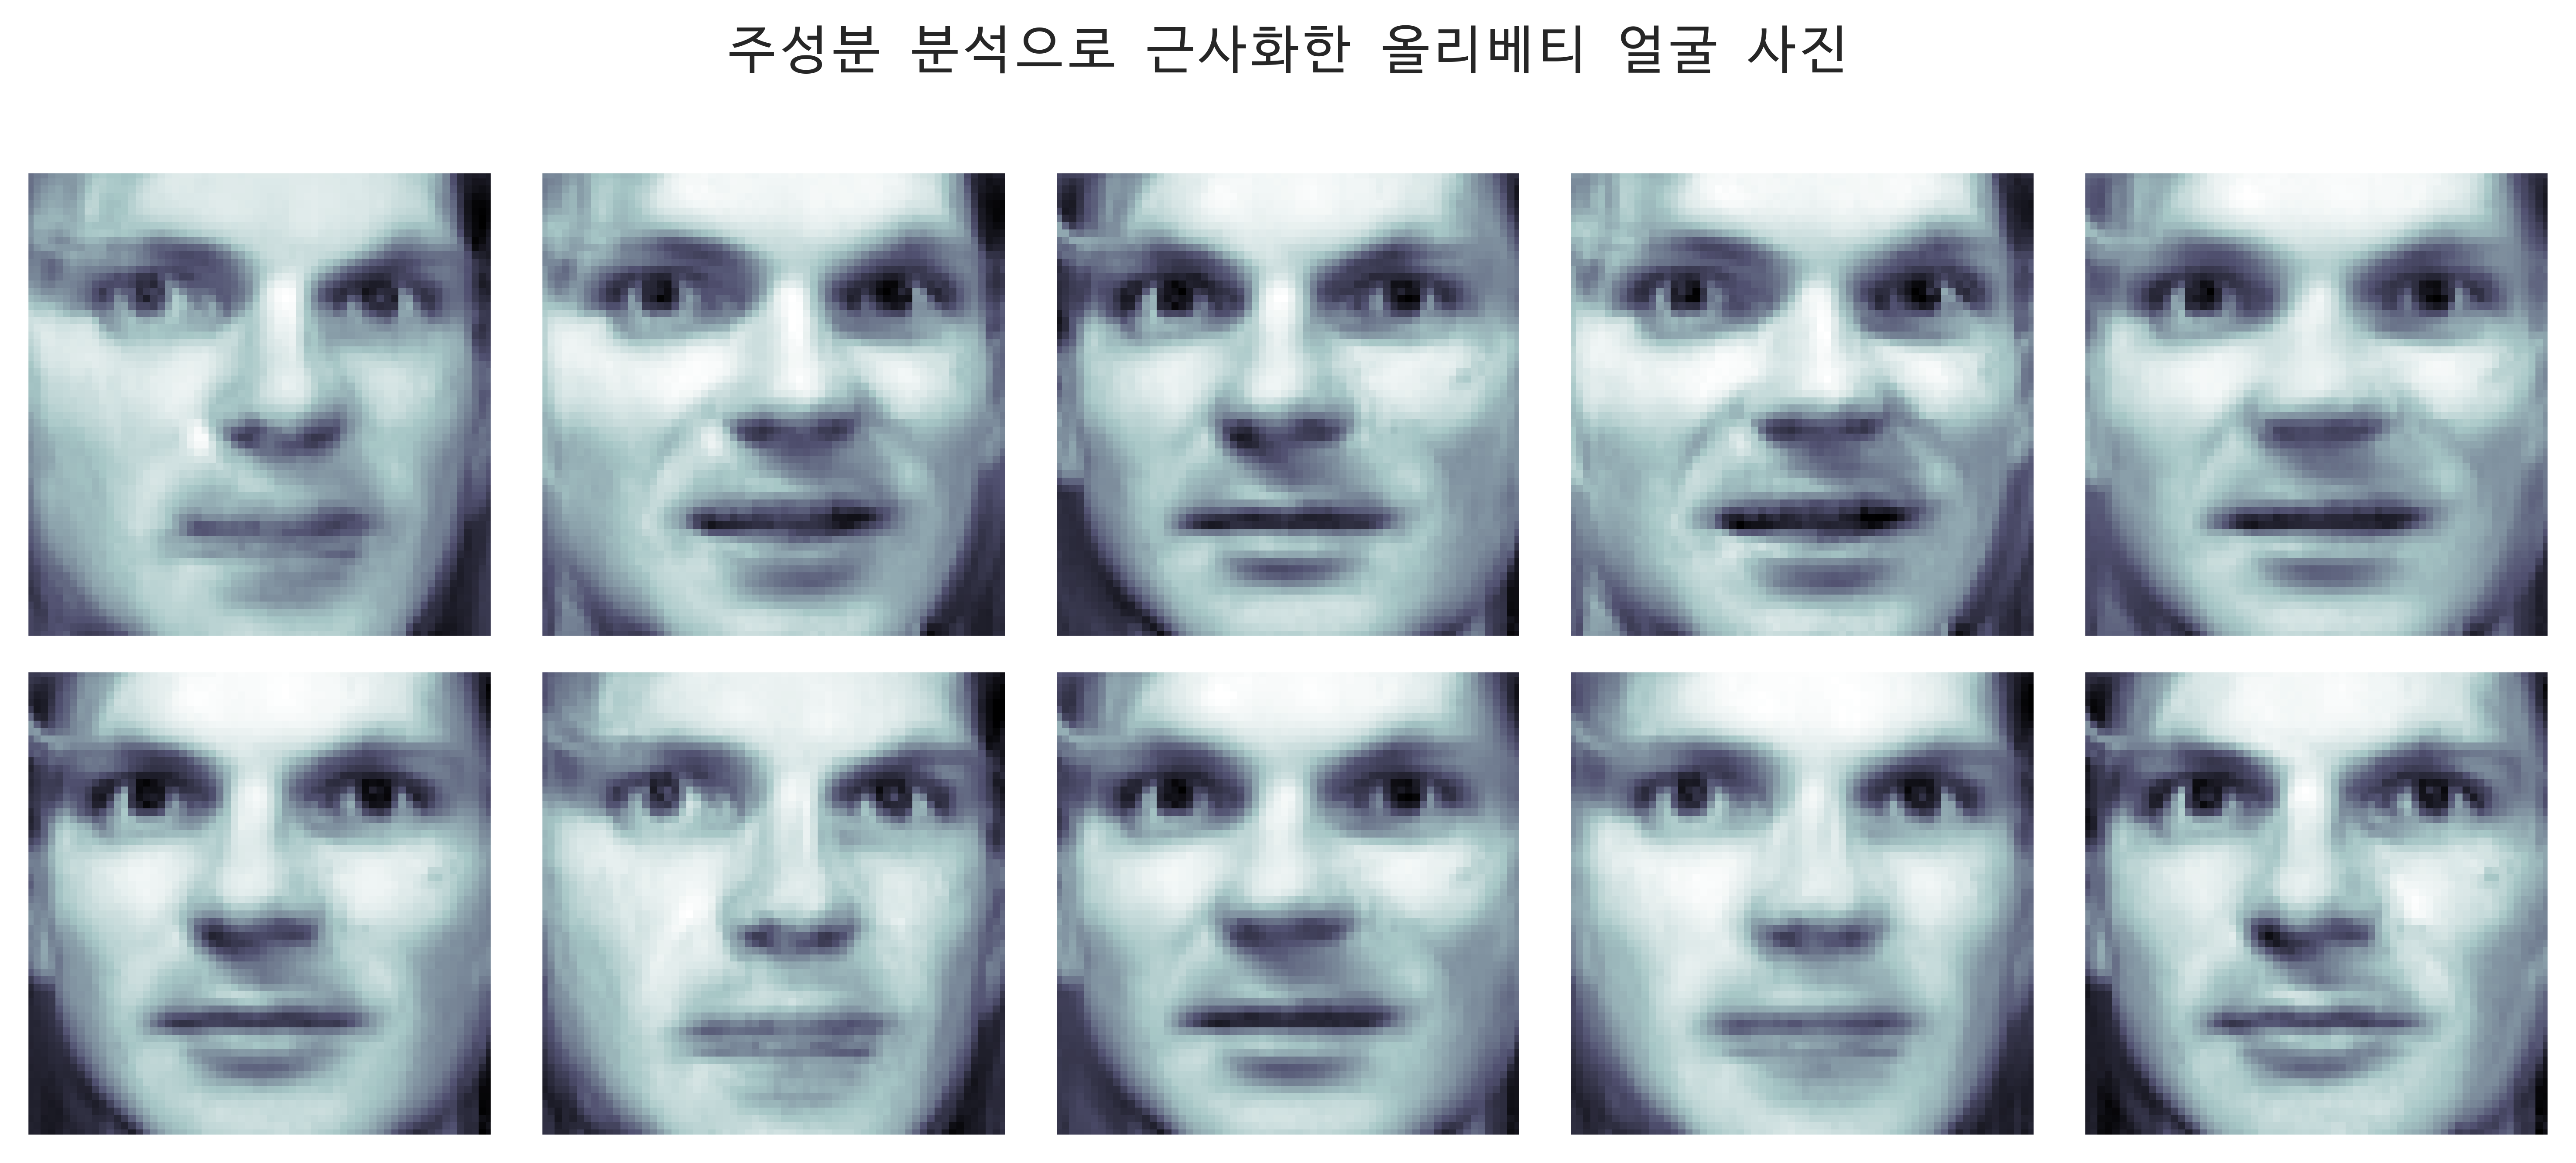

In [103]:
# 이미지 압축 : 4096개의 숫자를 2개의 숫자로 표현하기
pca4 = PCA(n_components=2)
X4 = faces_all.data[faces_all.target == K]
W4 = pca4.fit_transform(X4)
X42 = pca4.inverse_transform(W4)

# Eigen Face
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X42[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

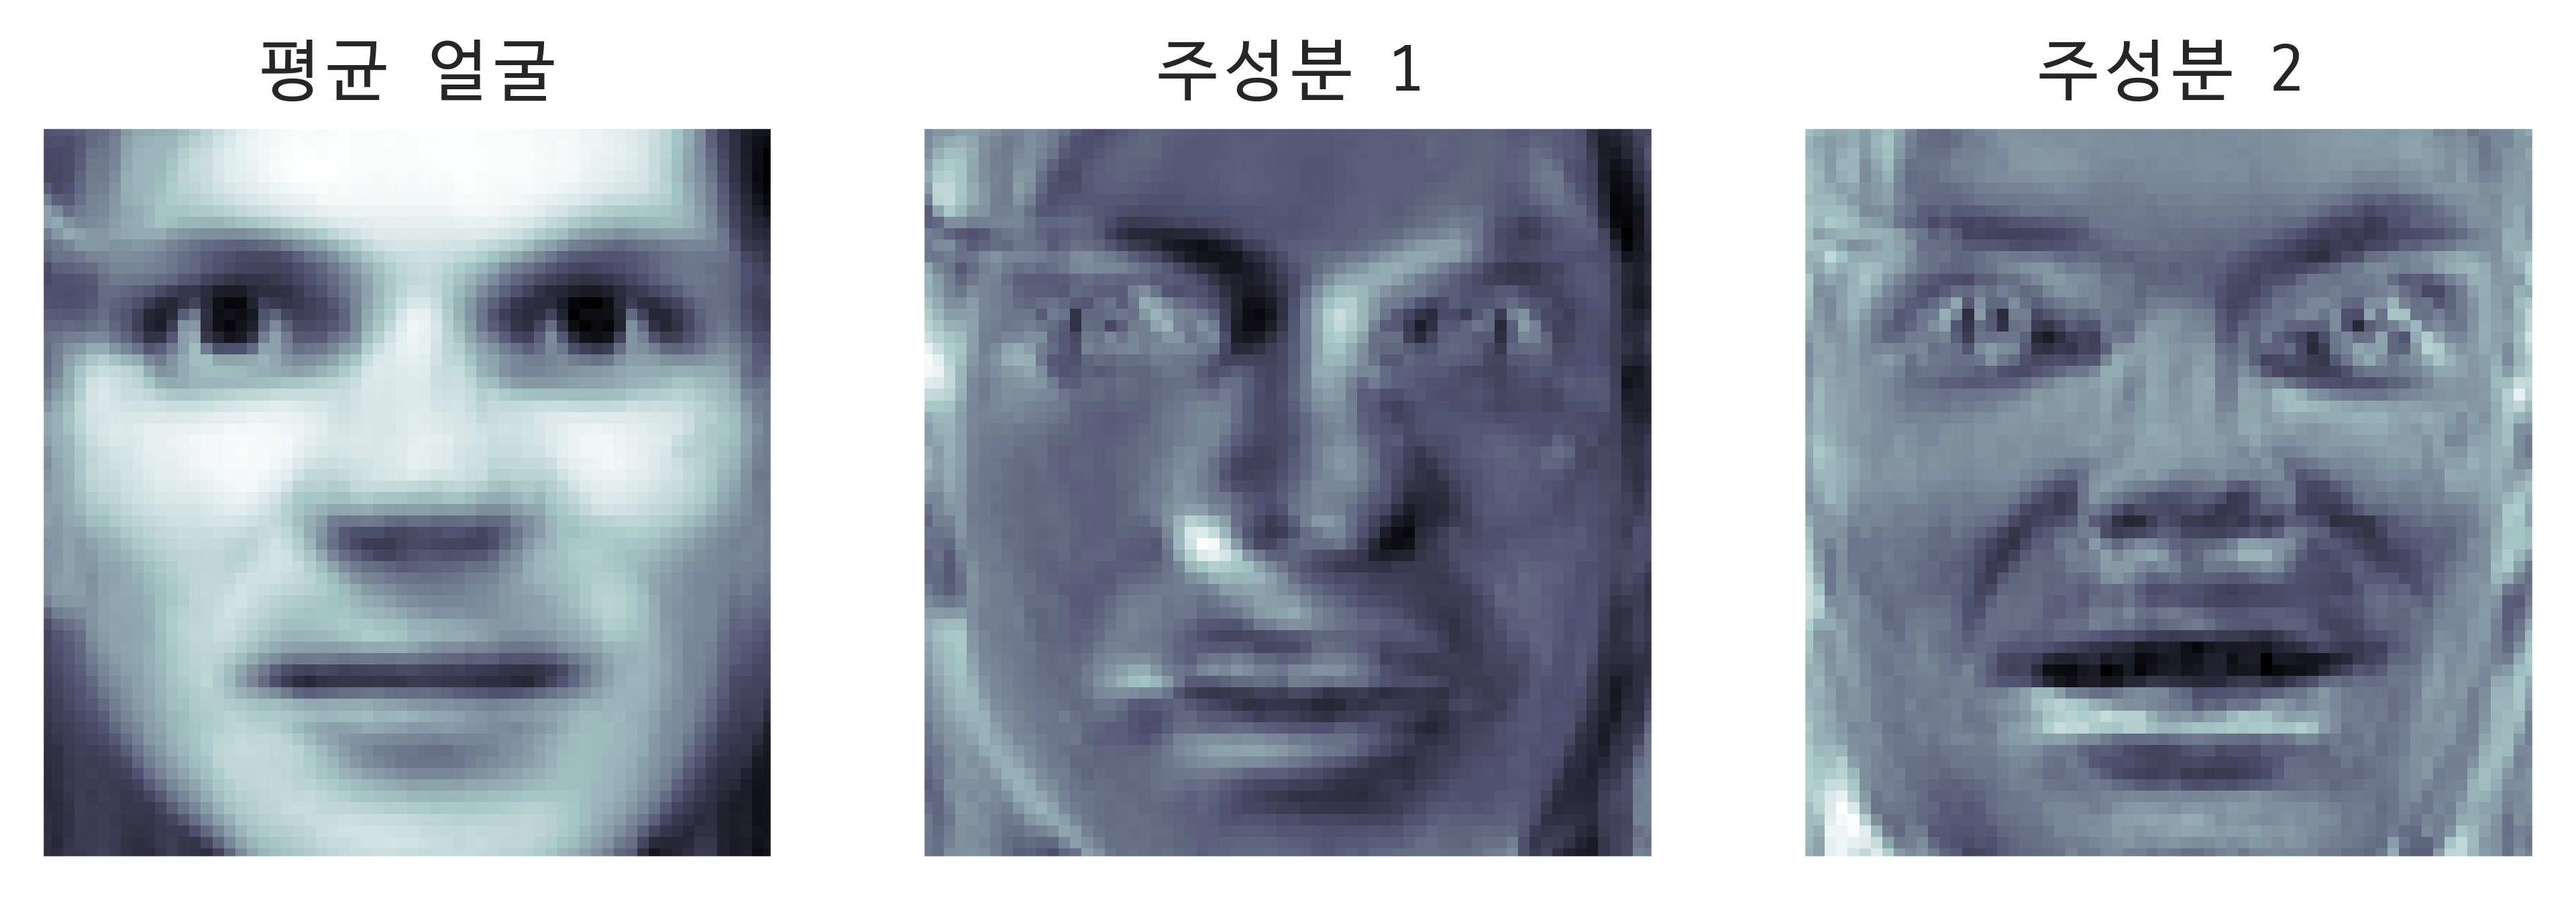

In [104]:
# 주성분 분석
face_mean = pca4.mean_.reshape(64, 64)
face_p1 = pca4.components_[0].reshape(64, 64)
face_p2 = pca4.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")   # 원래 이미지(위치)가 아니라 방향을 나타내는 기저벡터이기 때문에 이미지가 이상하게 출력됨
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")    # 주성분 1에 이어 두번째로 많이 변한 방향
plt.show()

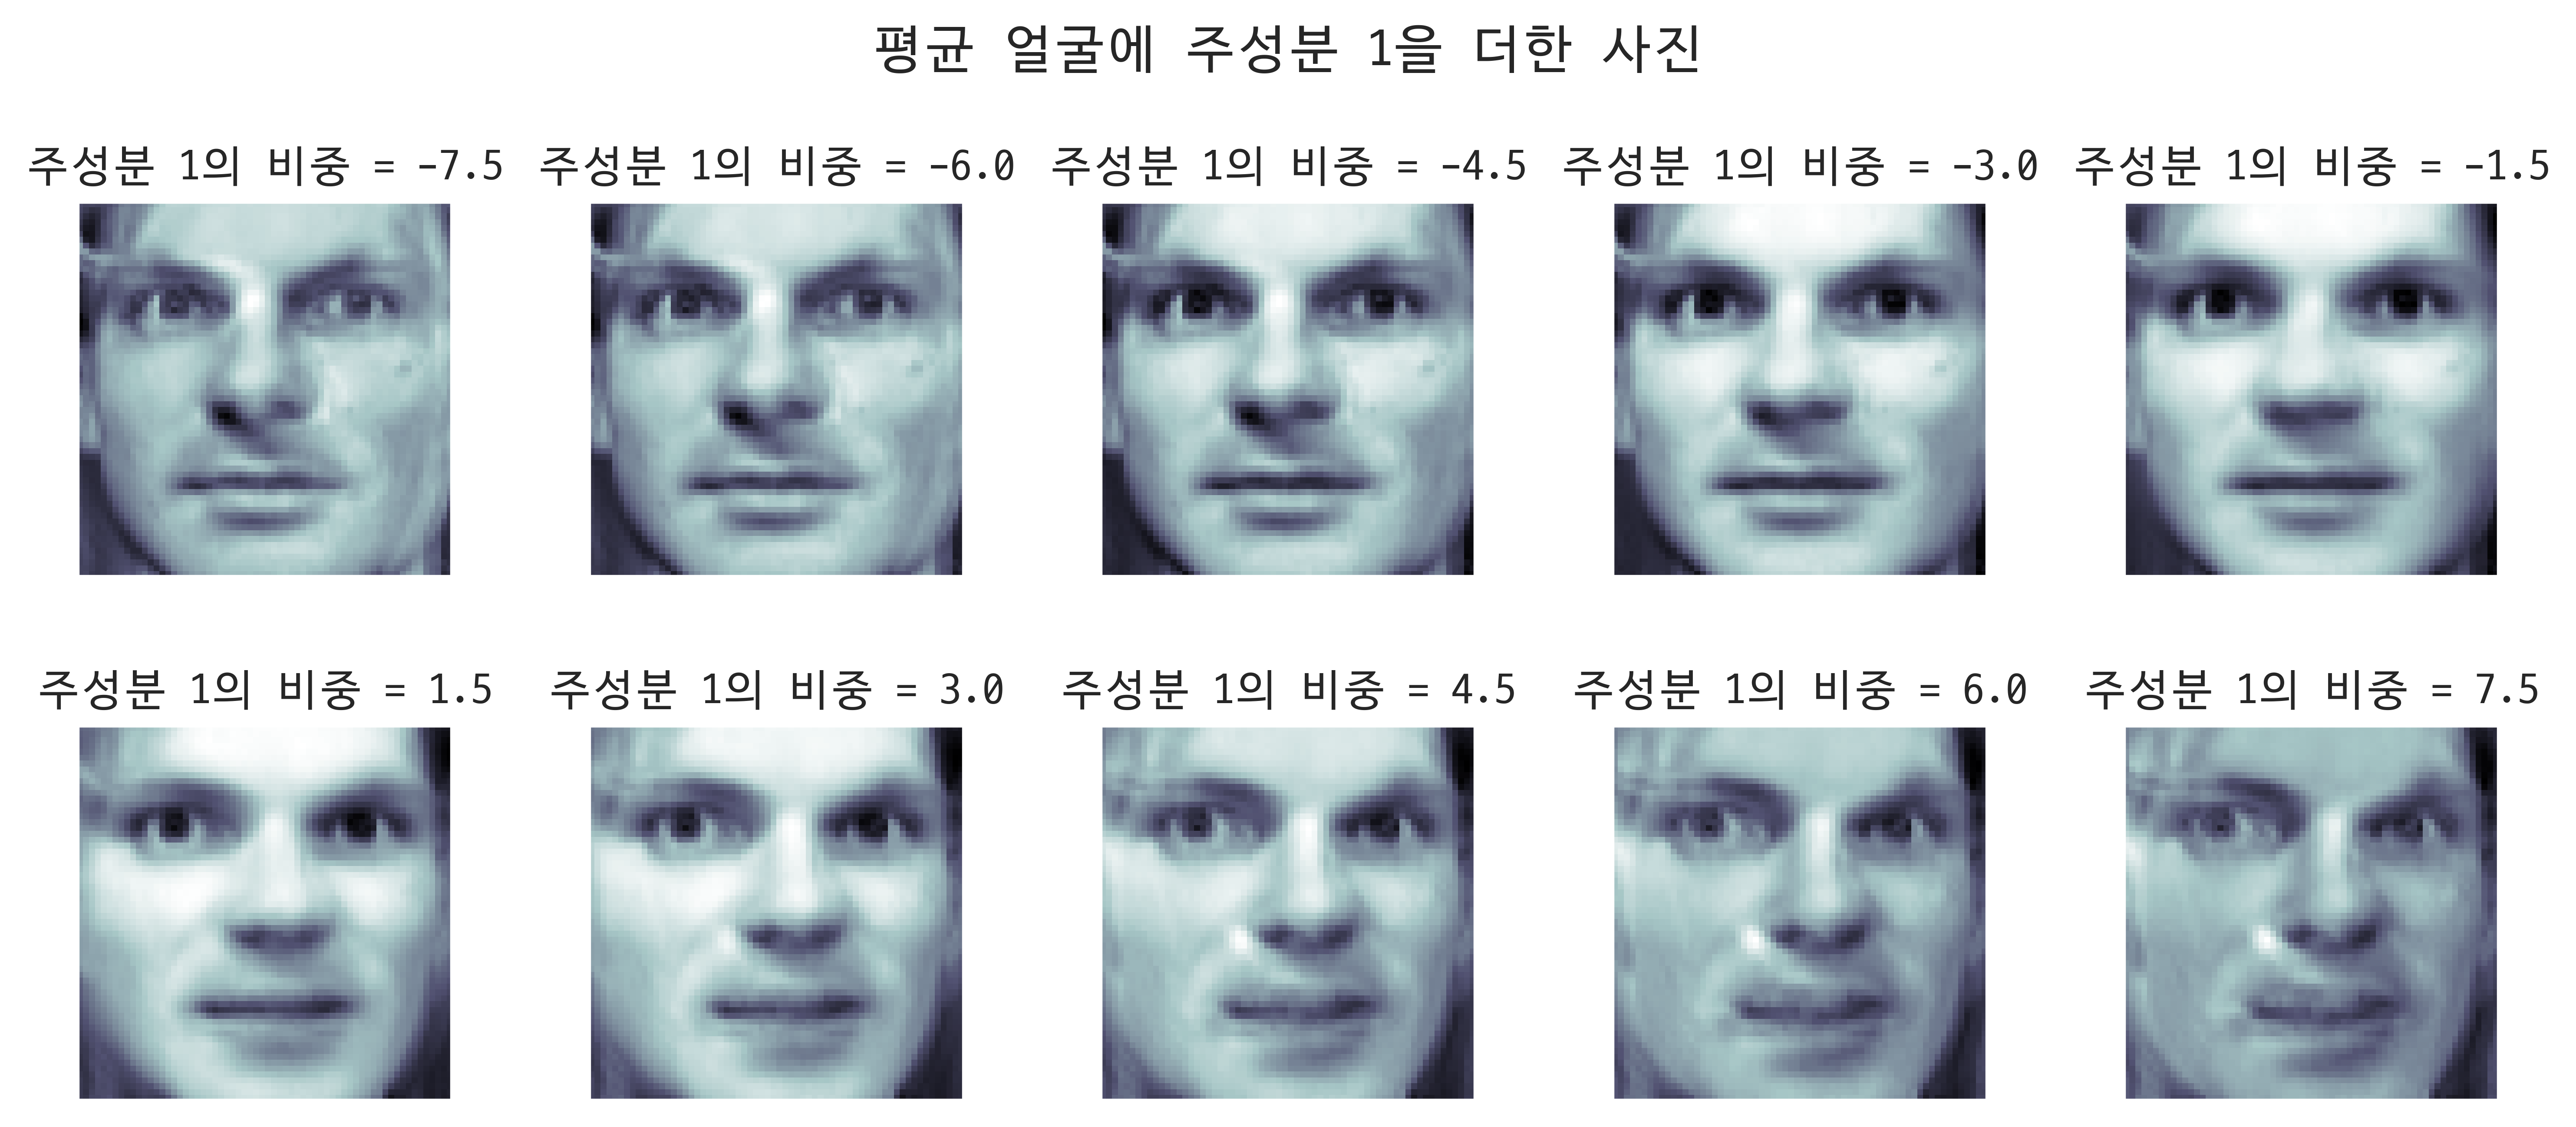

In [105]:
# 합성 이미지 만들기 1
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분 1의 비중 = {}".format(w))
plt.suptitle("평균 얼굴에 주성분 1을 더한 사진")
plt.tight_layout()
plt.show()

# Insight 1: 고개가 오른쪽을 향하는 것, 왼쪽을 향하는 것이 가장 큰 차이다

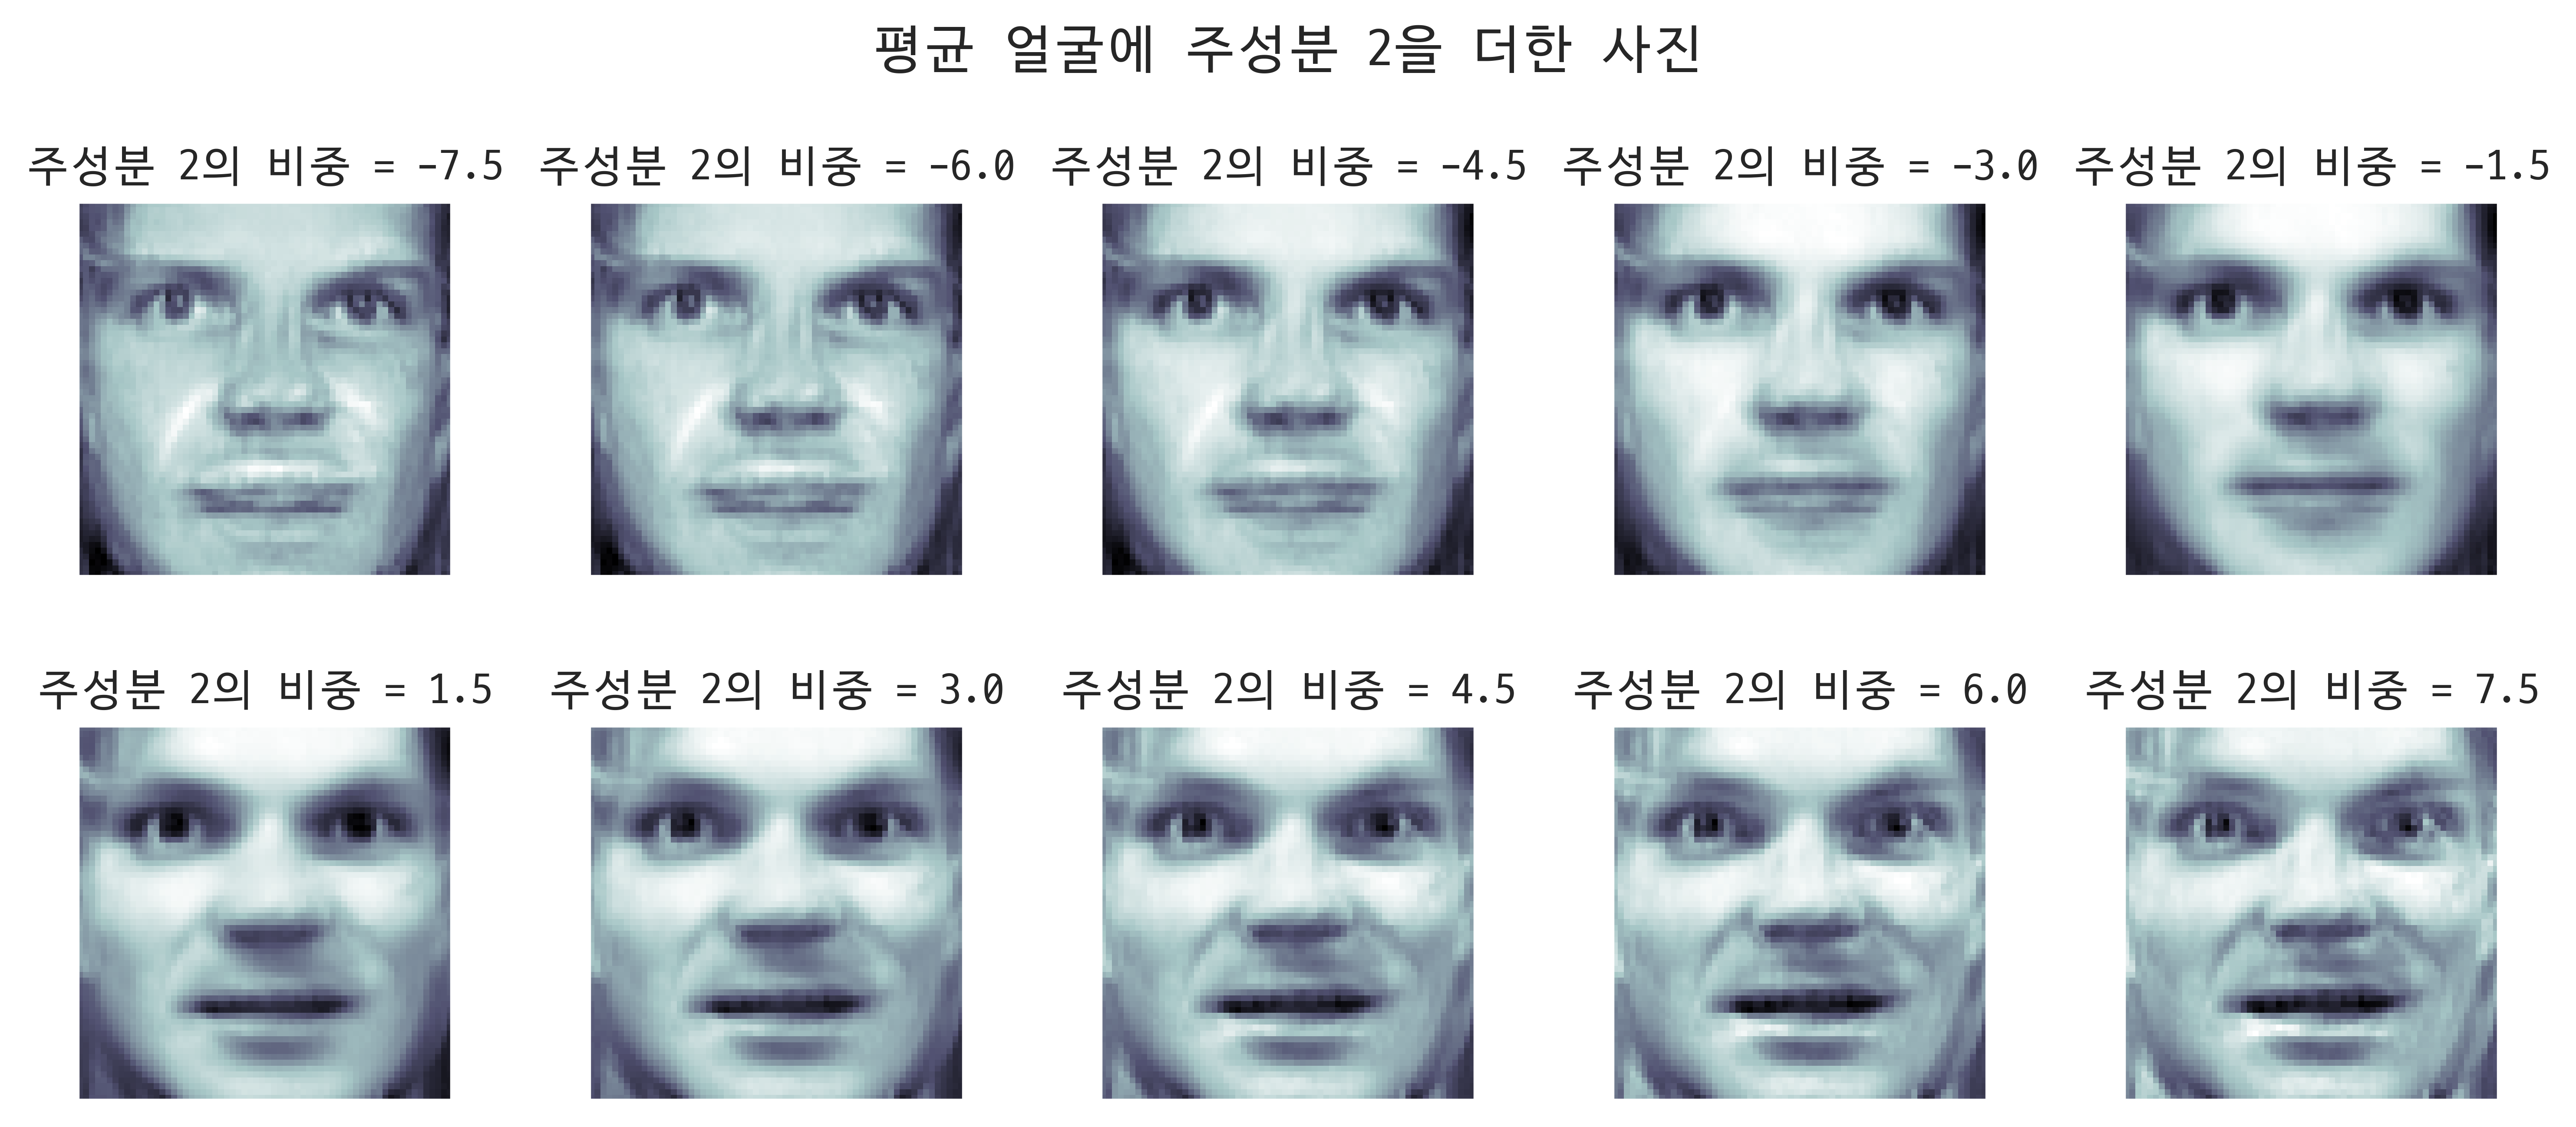

In [106]:
# 합성 이미지 만들기 2
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분 2의 비중 = {}".format(w))
plt.suptitle("평균 얼굴에 주성분 2을 더한 사진")
plt.tight_layout()
plt.show()

# Insight 2: 웃지 않는 것, 웃는 것이 그 다음으로 큰 차이다

#### 주식 가격의 PCA

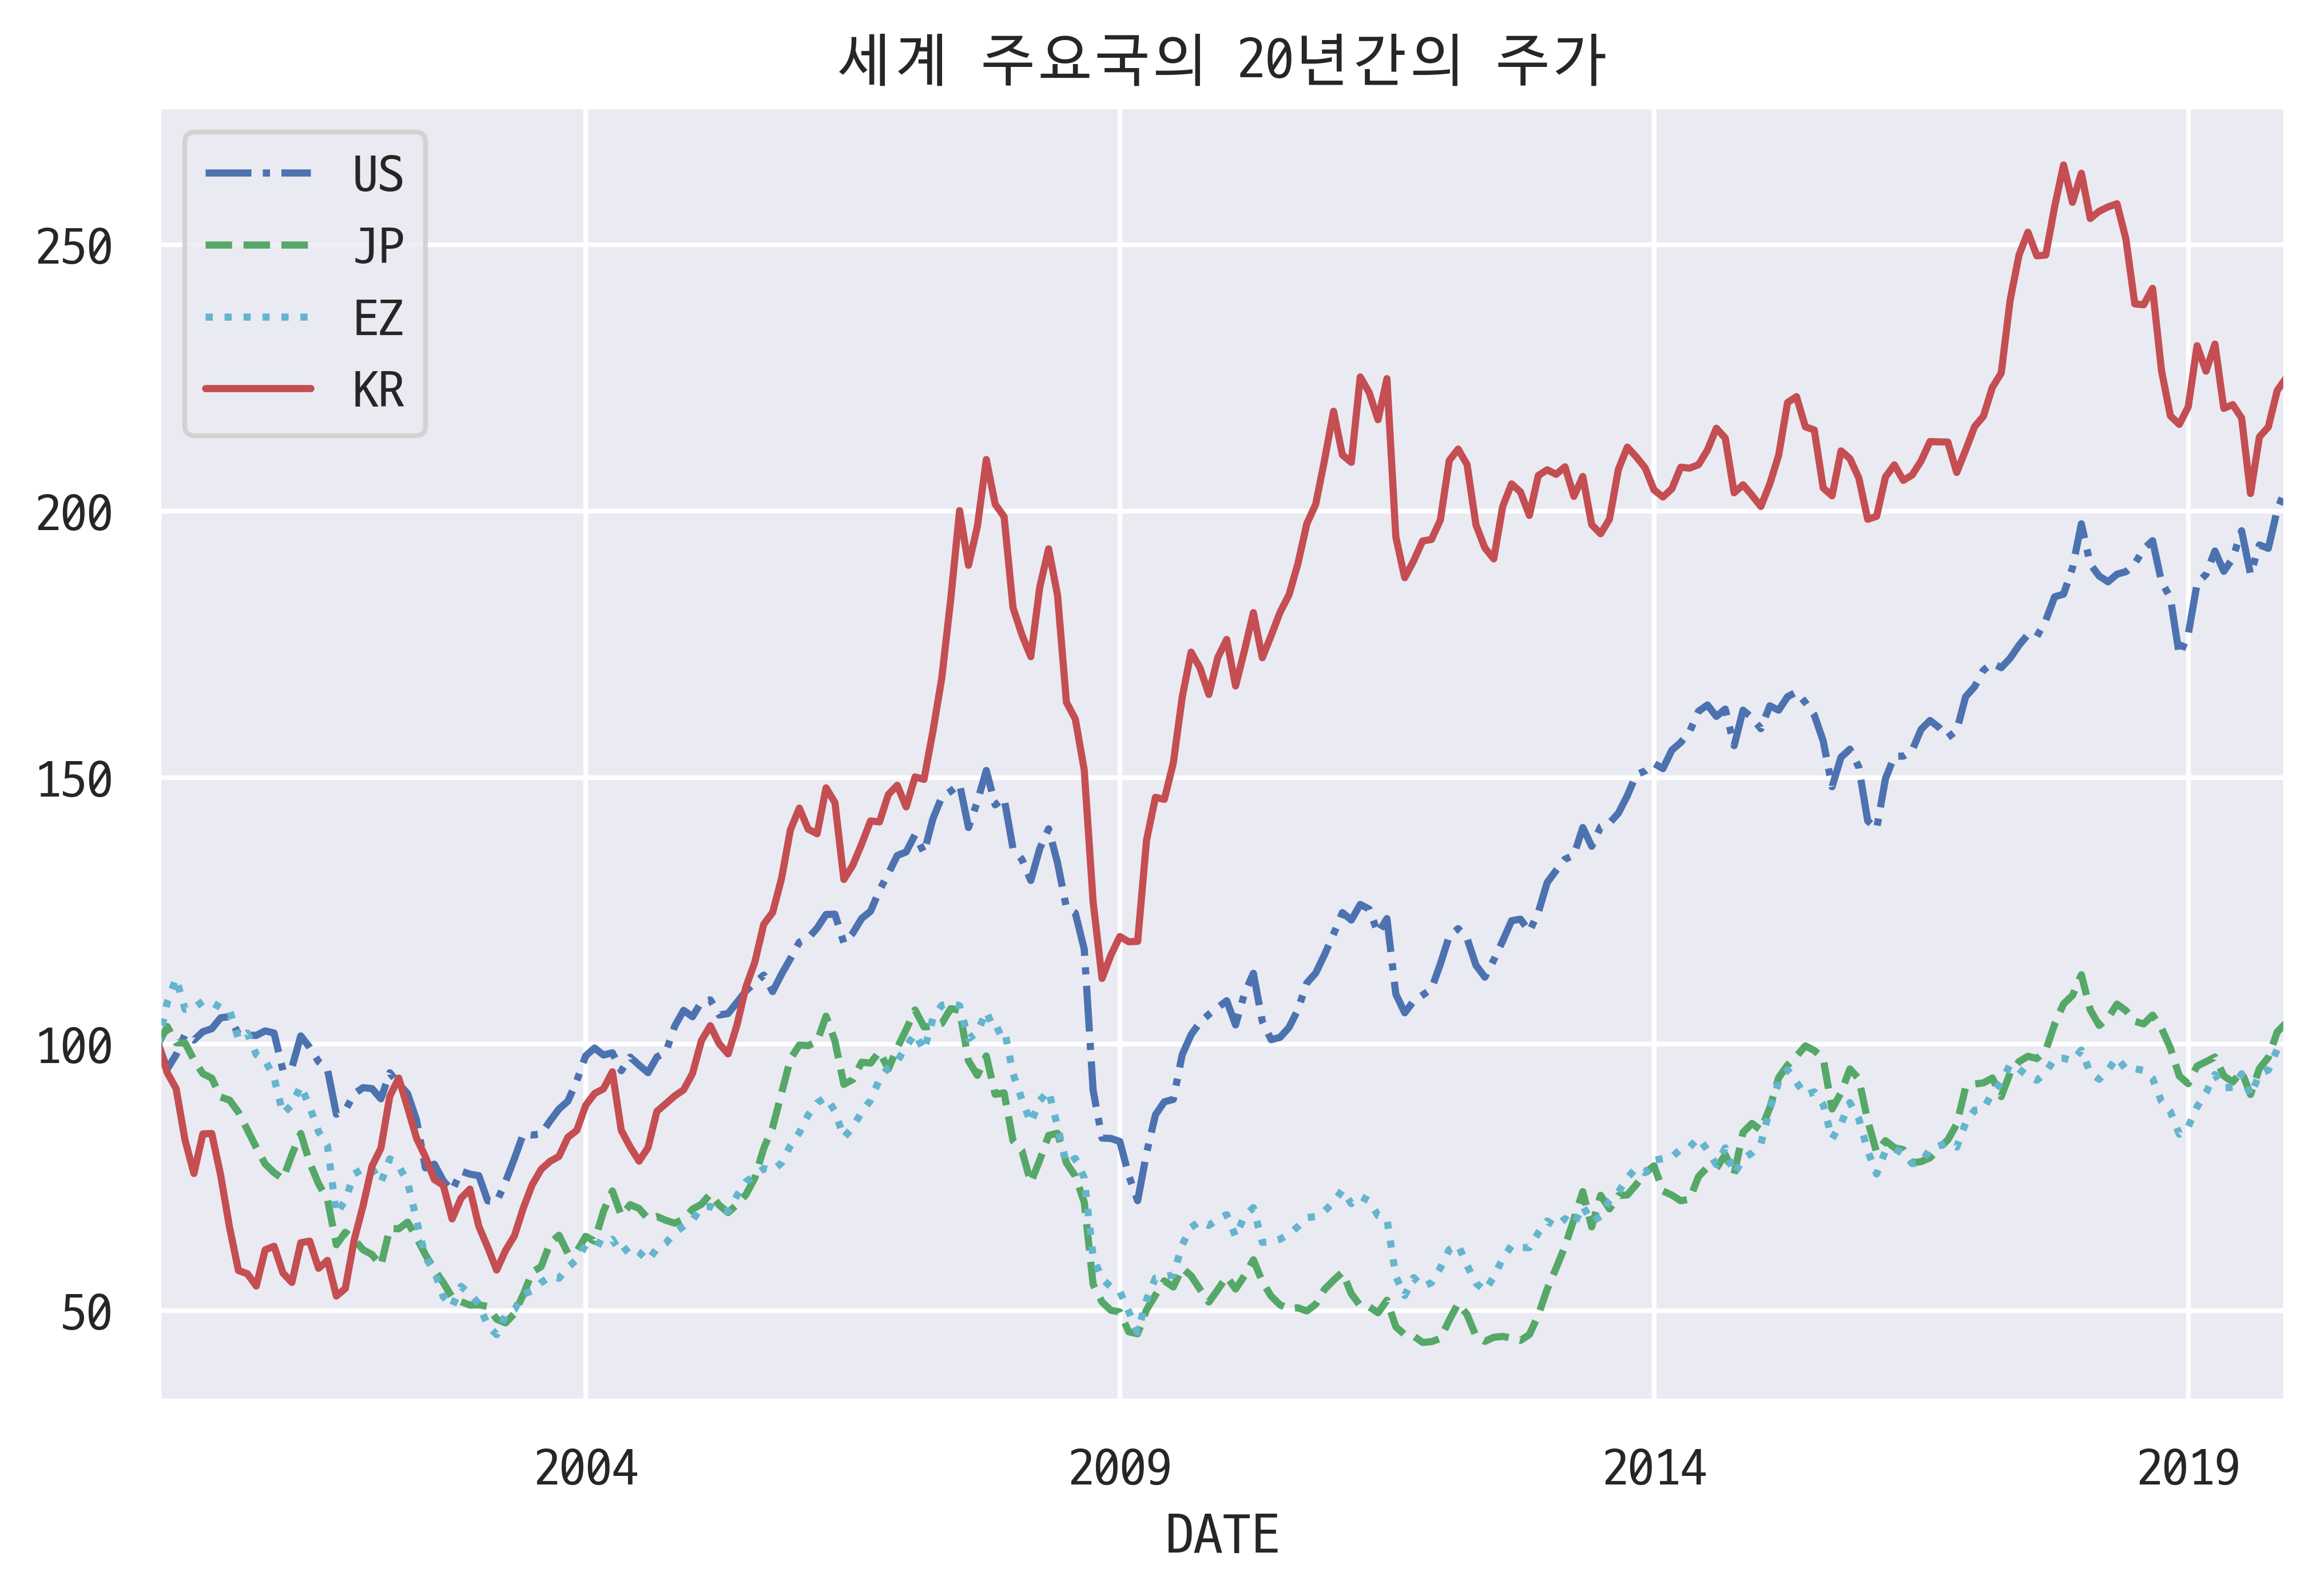

In [119]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

symbols = [
    "SPASTT01USM661N",
    "SPASTT01JPM661N",
    "SPASTT01EZM661N",
    "SPASTT01KRM661N",
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred',
                               start=datetime.datetime(2000, 1, 1),
                               end=datetime.datetime(2019, 12, 31))[sym]
data.columns = ['US', 'JP', 'EZ', 'KR']
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("세계 주요국의 20년간의 주가")
plt.show()

In [120]:
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:, :5])

DATE  2000-12-31  2001-12-31  2002-12-31  2003-12-31  2004-12-31
US      1.629238   -9.638213  -17.680773   23.135271   14.233654
JP    -19.382211  -23.827406  -16.923968   19.628102    9.945947
EZ     -1.966837  -21.857080  -30.647772   12.066127   10.551998
KR    -45.401205   27.644005    4.448180   15.121124    9.091136


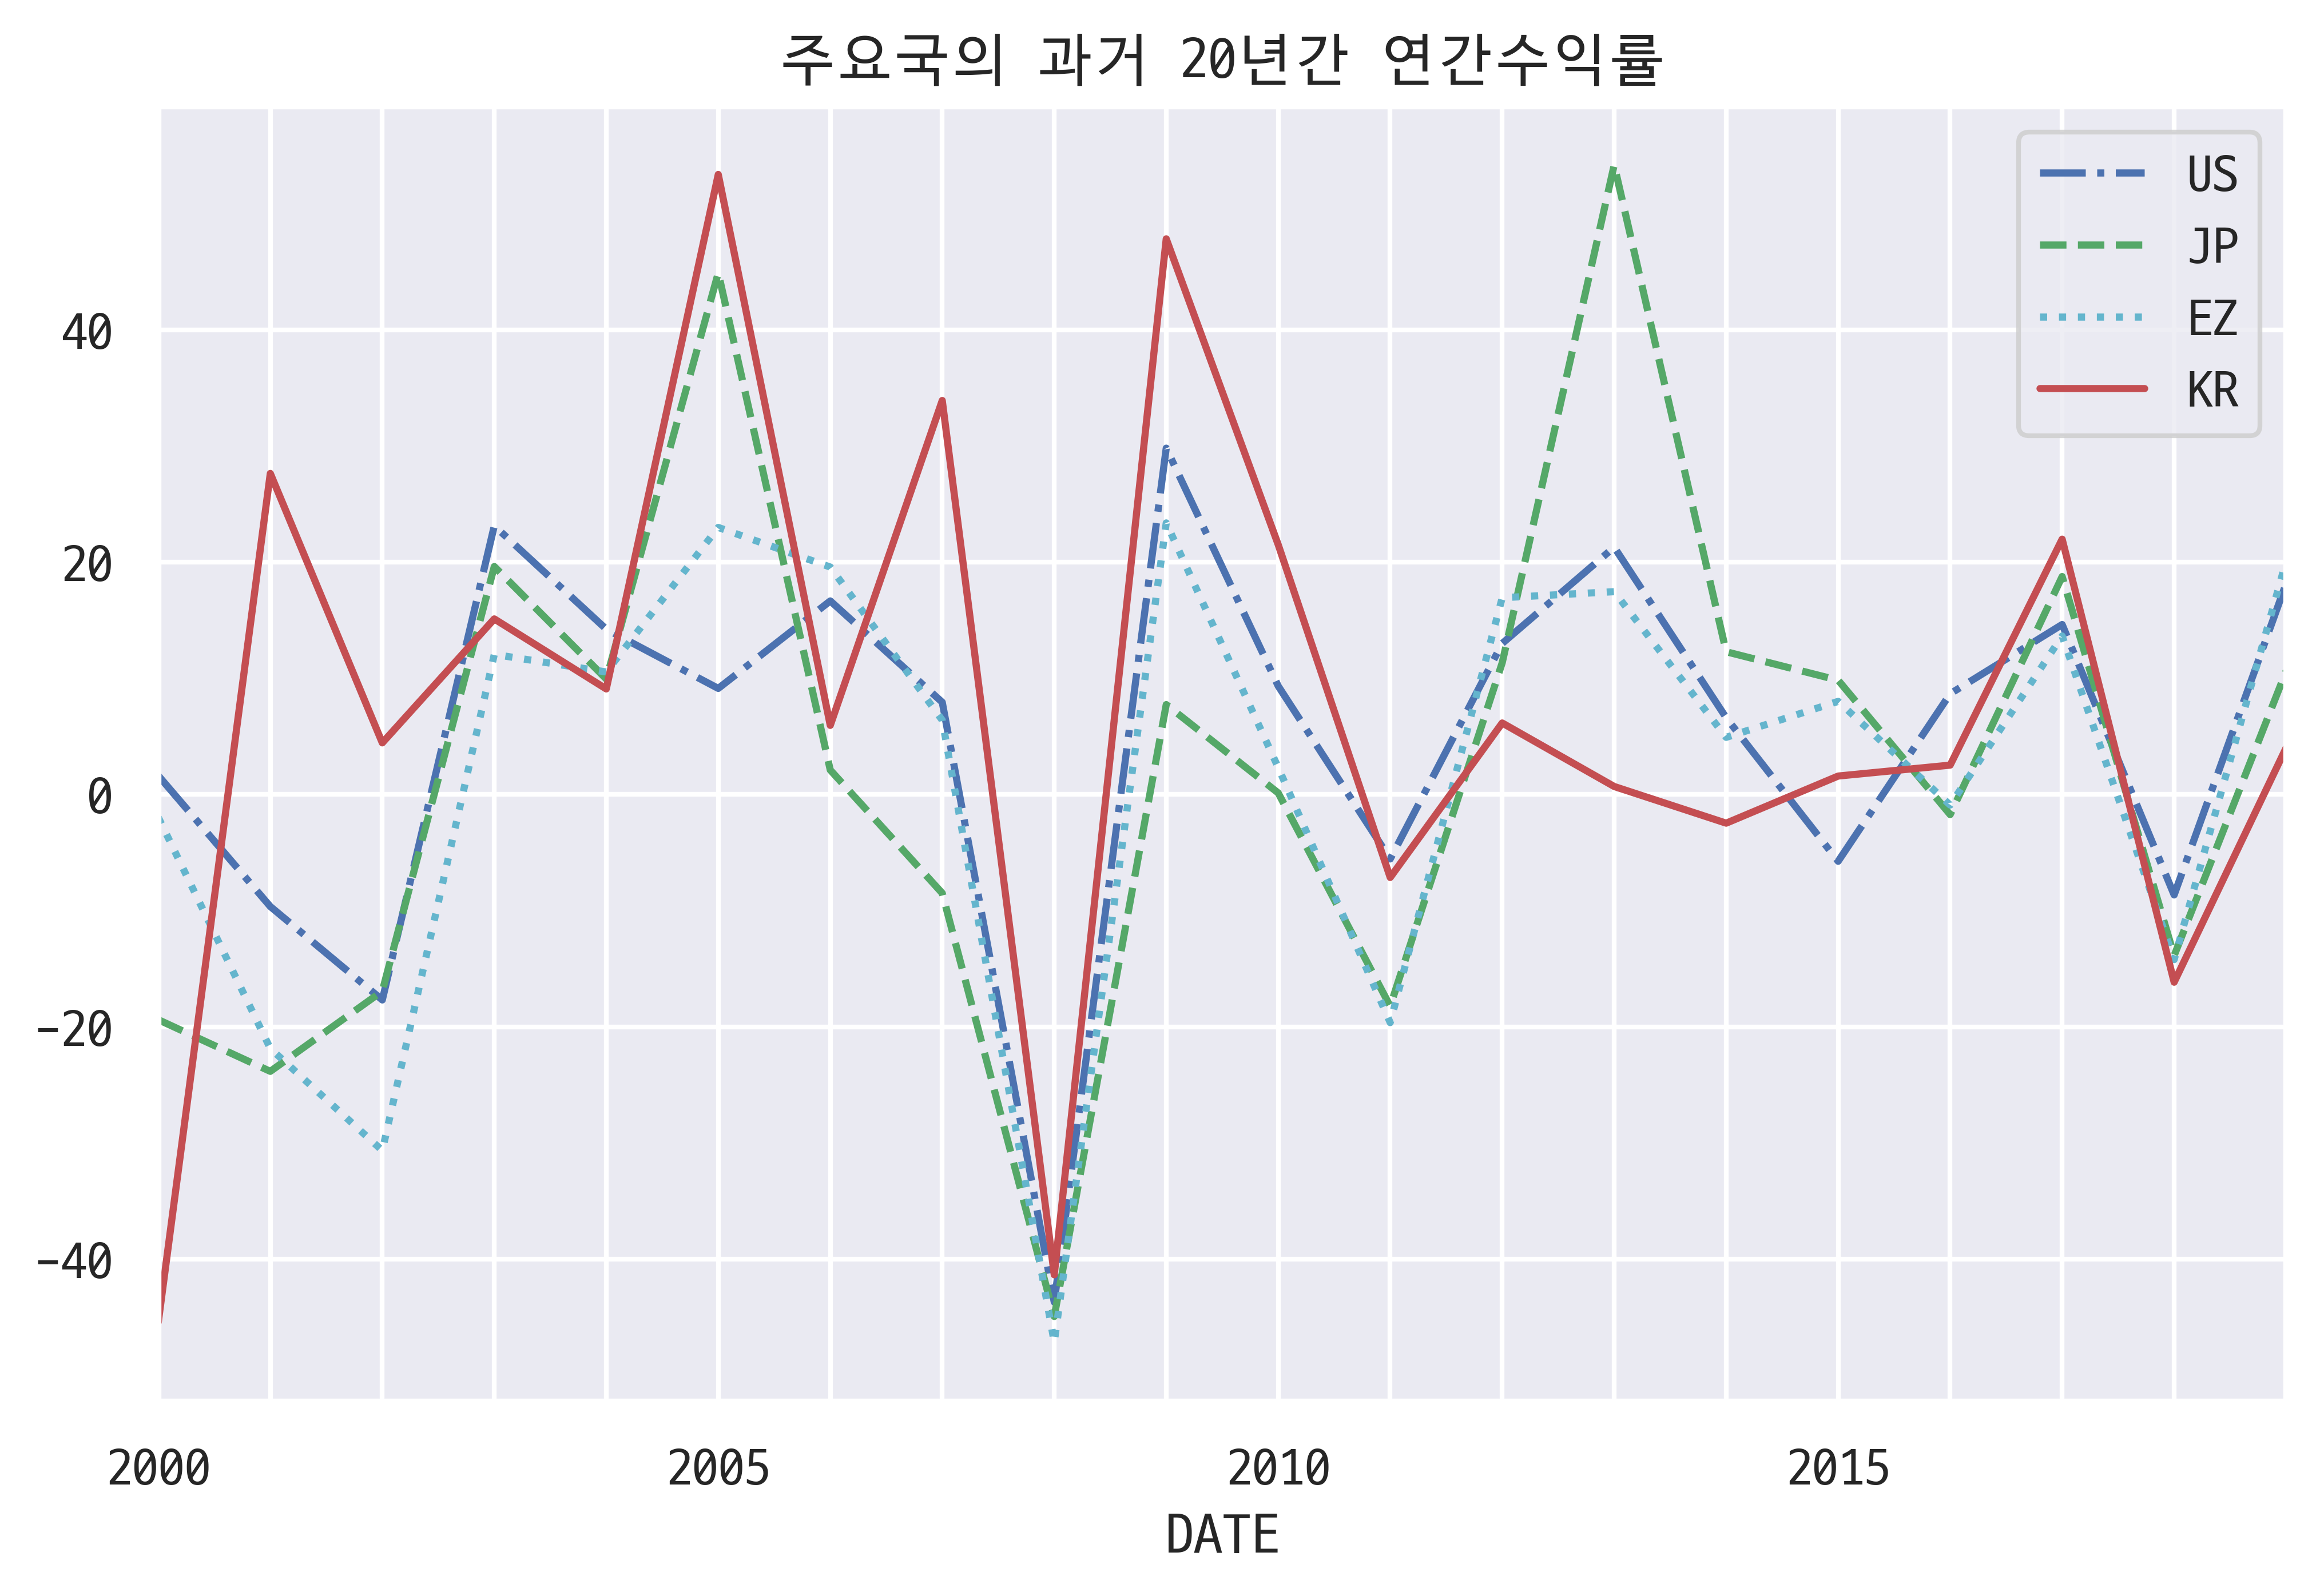

In [121]:
df.T.plot(style=styles)
plt.title("주요국의 과거 20년간 연간수익률")
plt.xticks(df.columns)
plt.show()

In [122]:
pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)

In [123]:
m = pca2.mean_

In [124]:
p1 = pca2.components_[0]

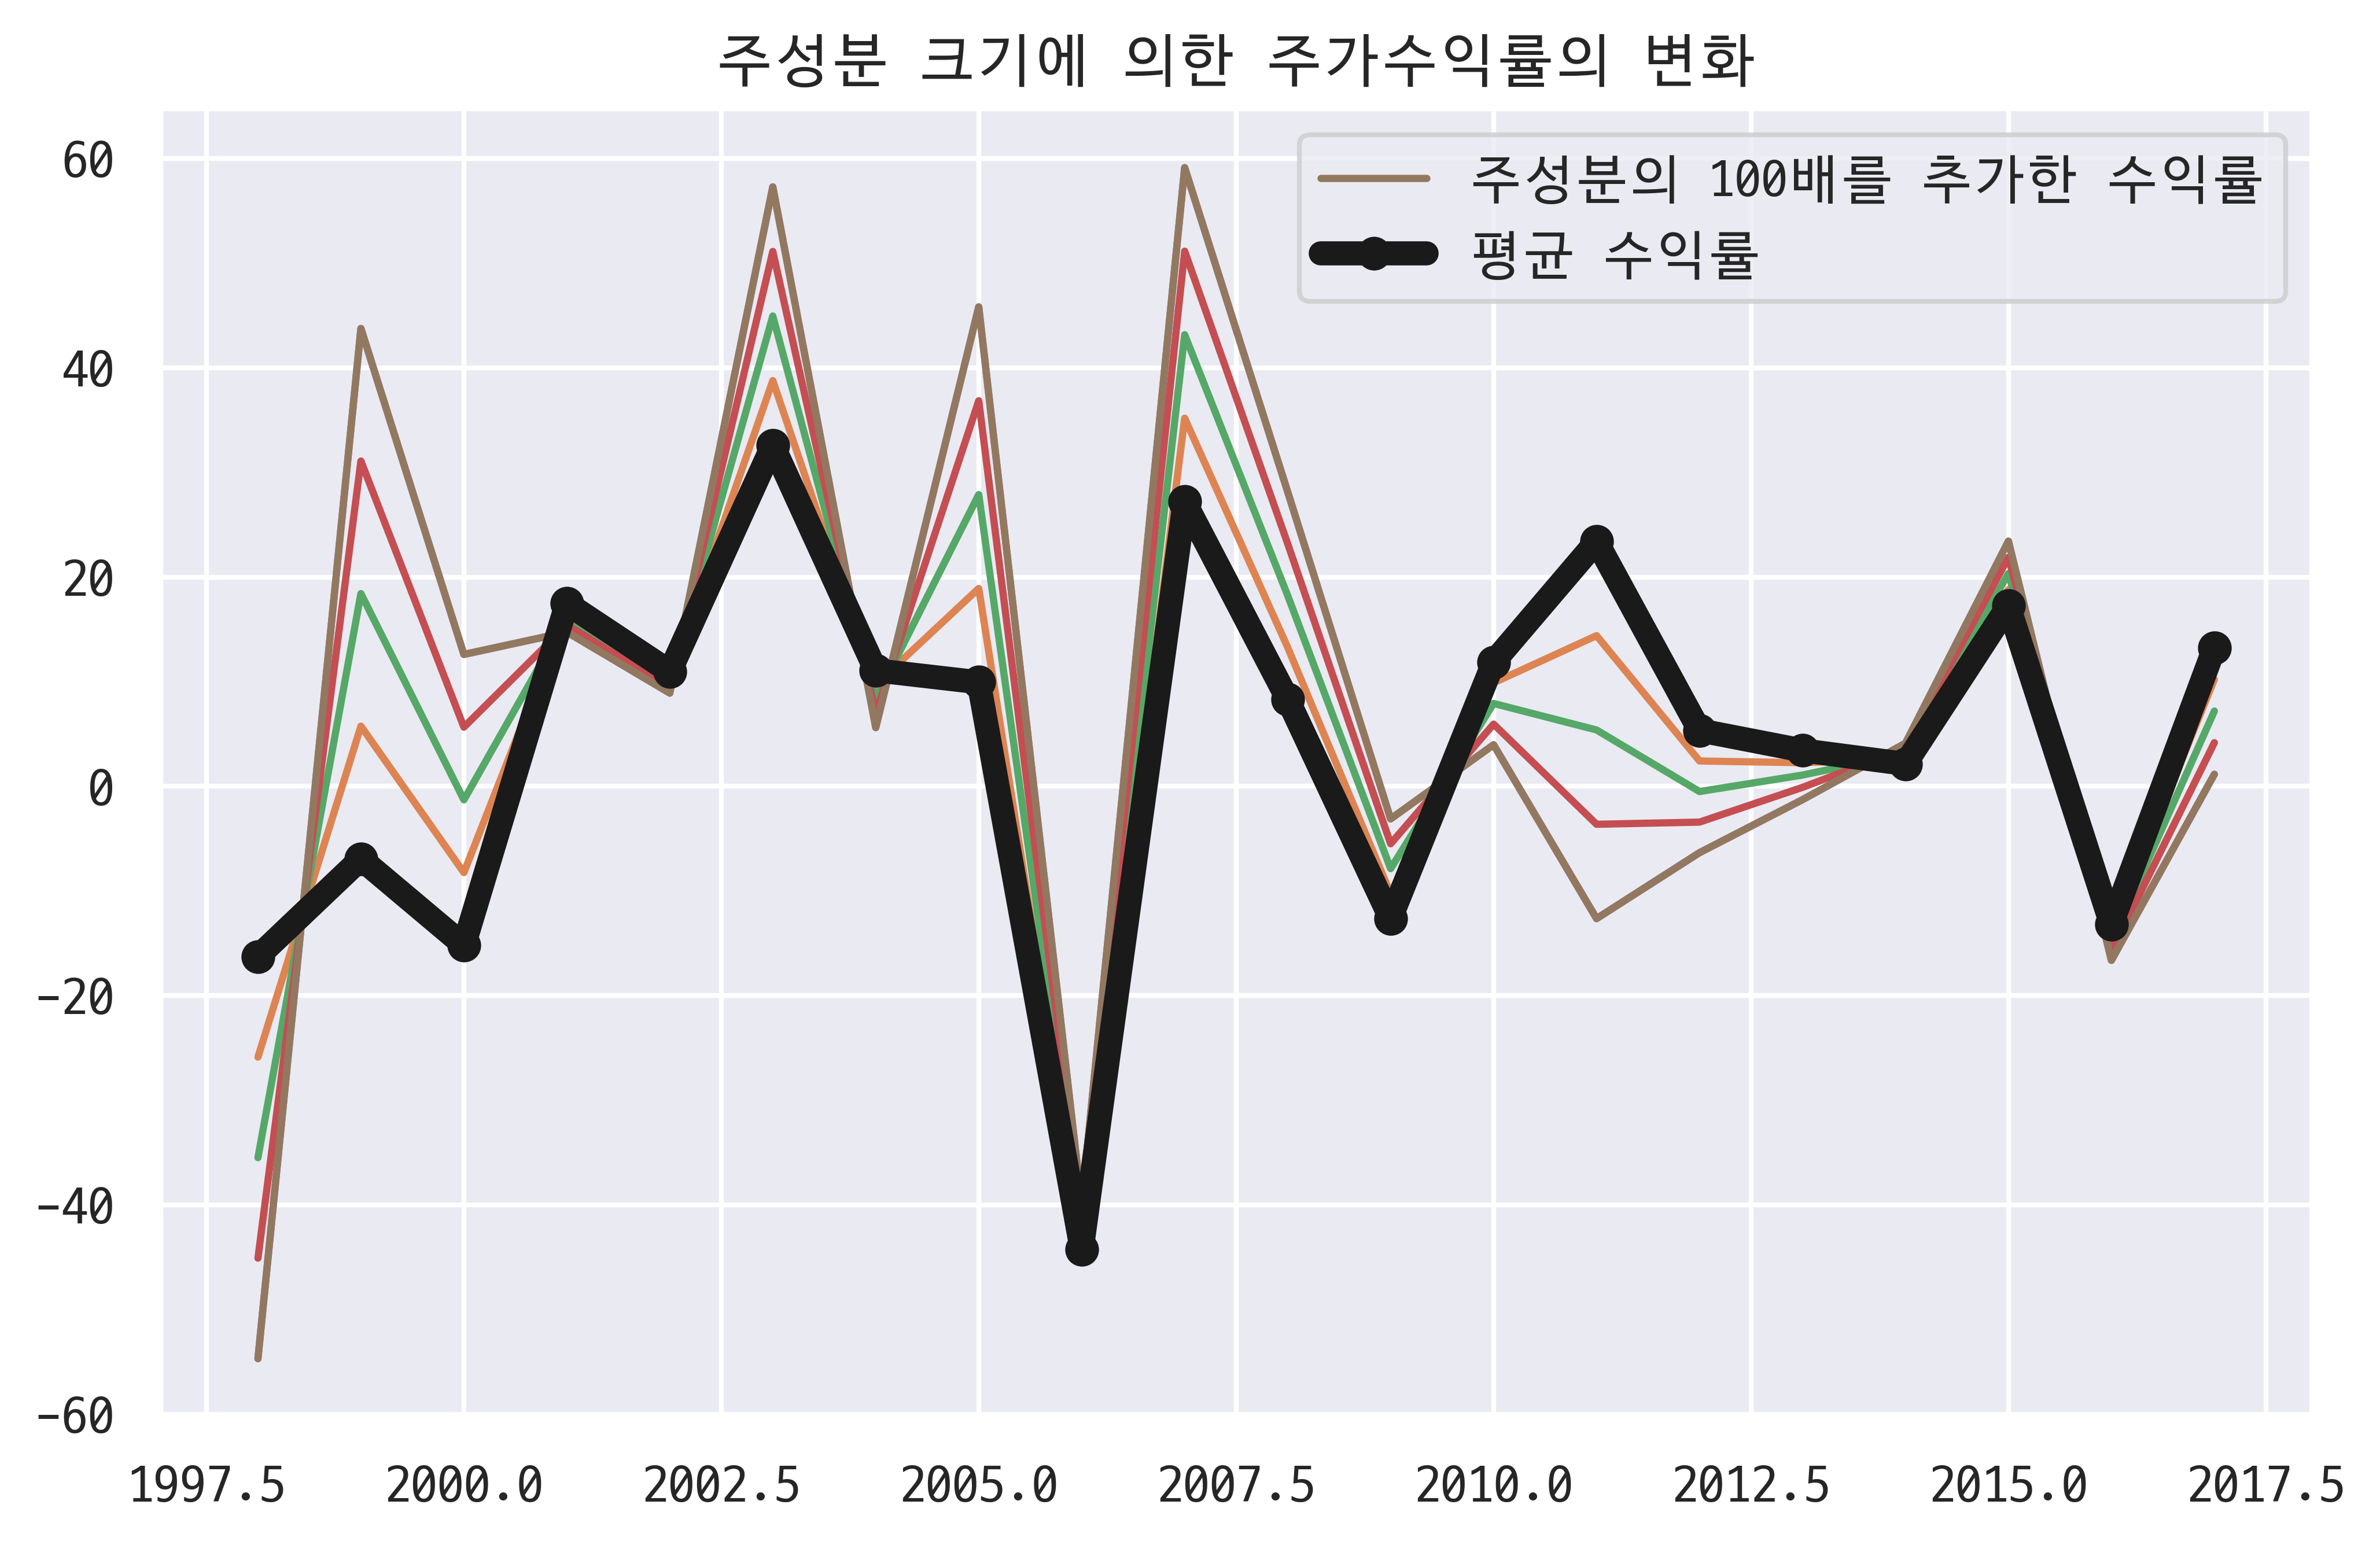

In [125]:
xrange = np.linspace(1998, 2017, 20, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_ + p1 * i)
plt.plot(xrange, pca2.mean_ + p1 * 100, label="주성분의 100배를 추가한 수익률")
plt.plot(xrange, pca2.mean_, "ko-", lw=5, label="평균 수익률")
plt.title("주성분 크기에 의한 주가수익률의 변화")
plt.legend()
plt.show()

In [126]:
df_w = pd.DataFrame(w)
df_w.index = df.index
df_w.columns = ["주성분 비중"]
print(df_w)

       주성분 비중
US -14.081557
JP -31.195809
EZ -24.018424
KR  69.295790


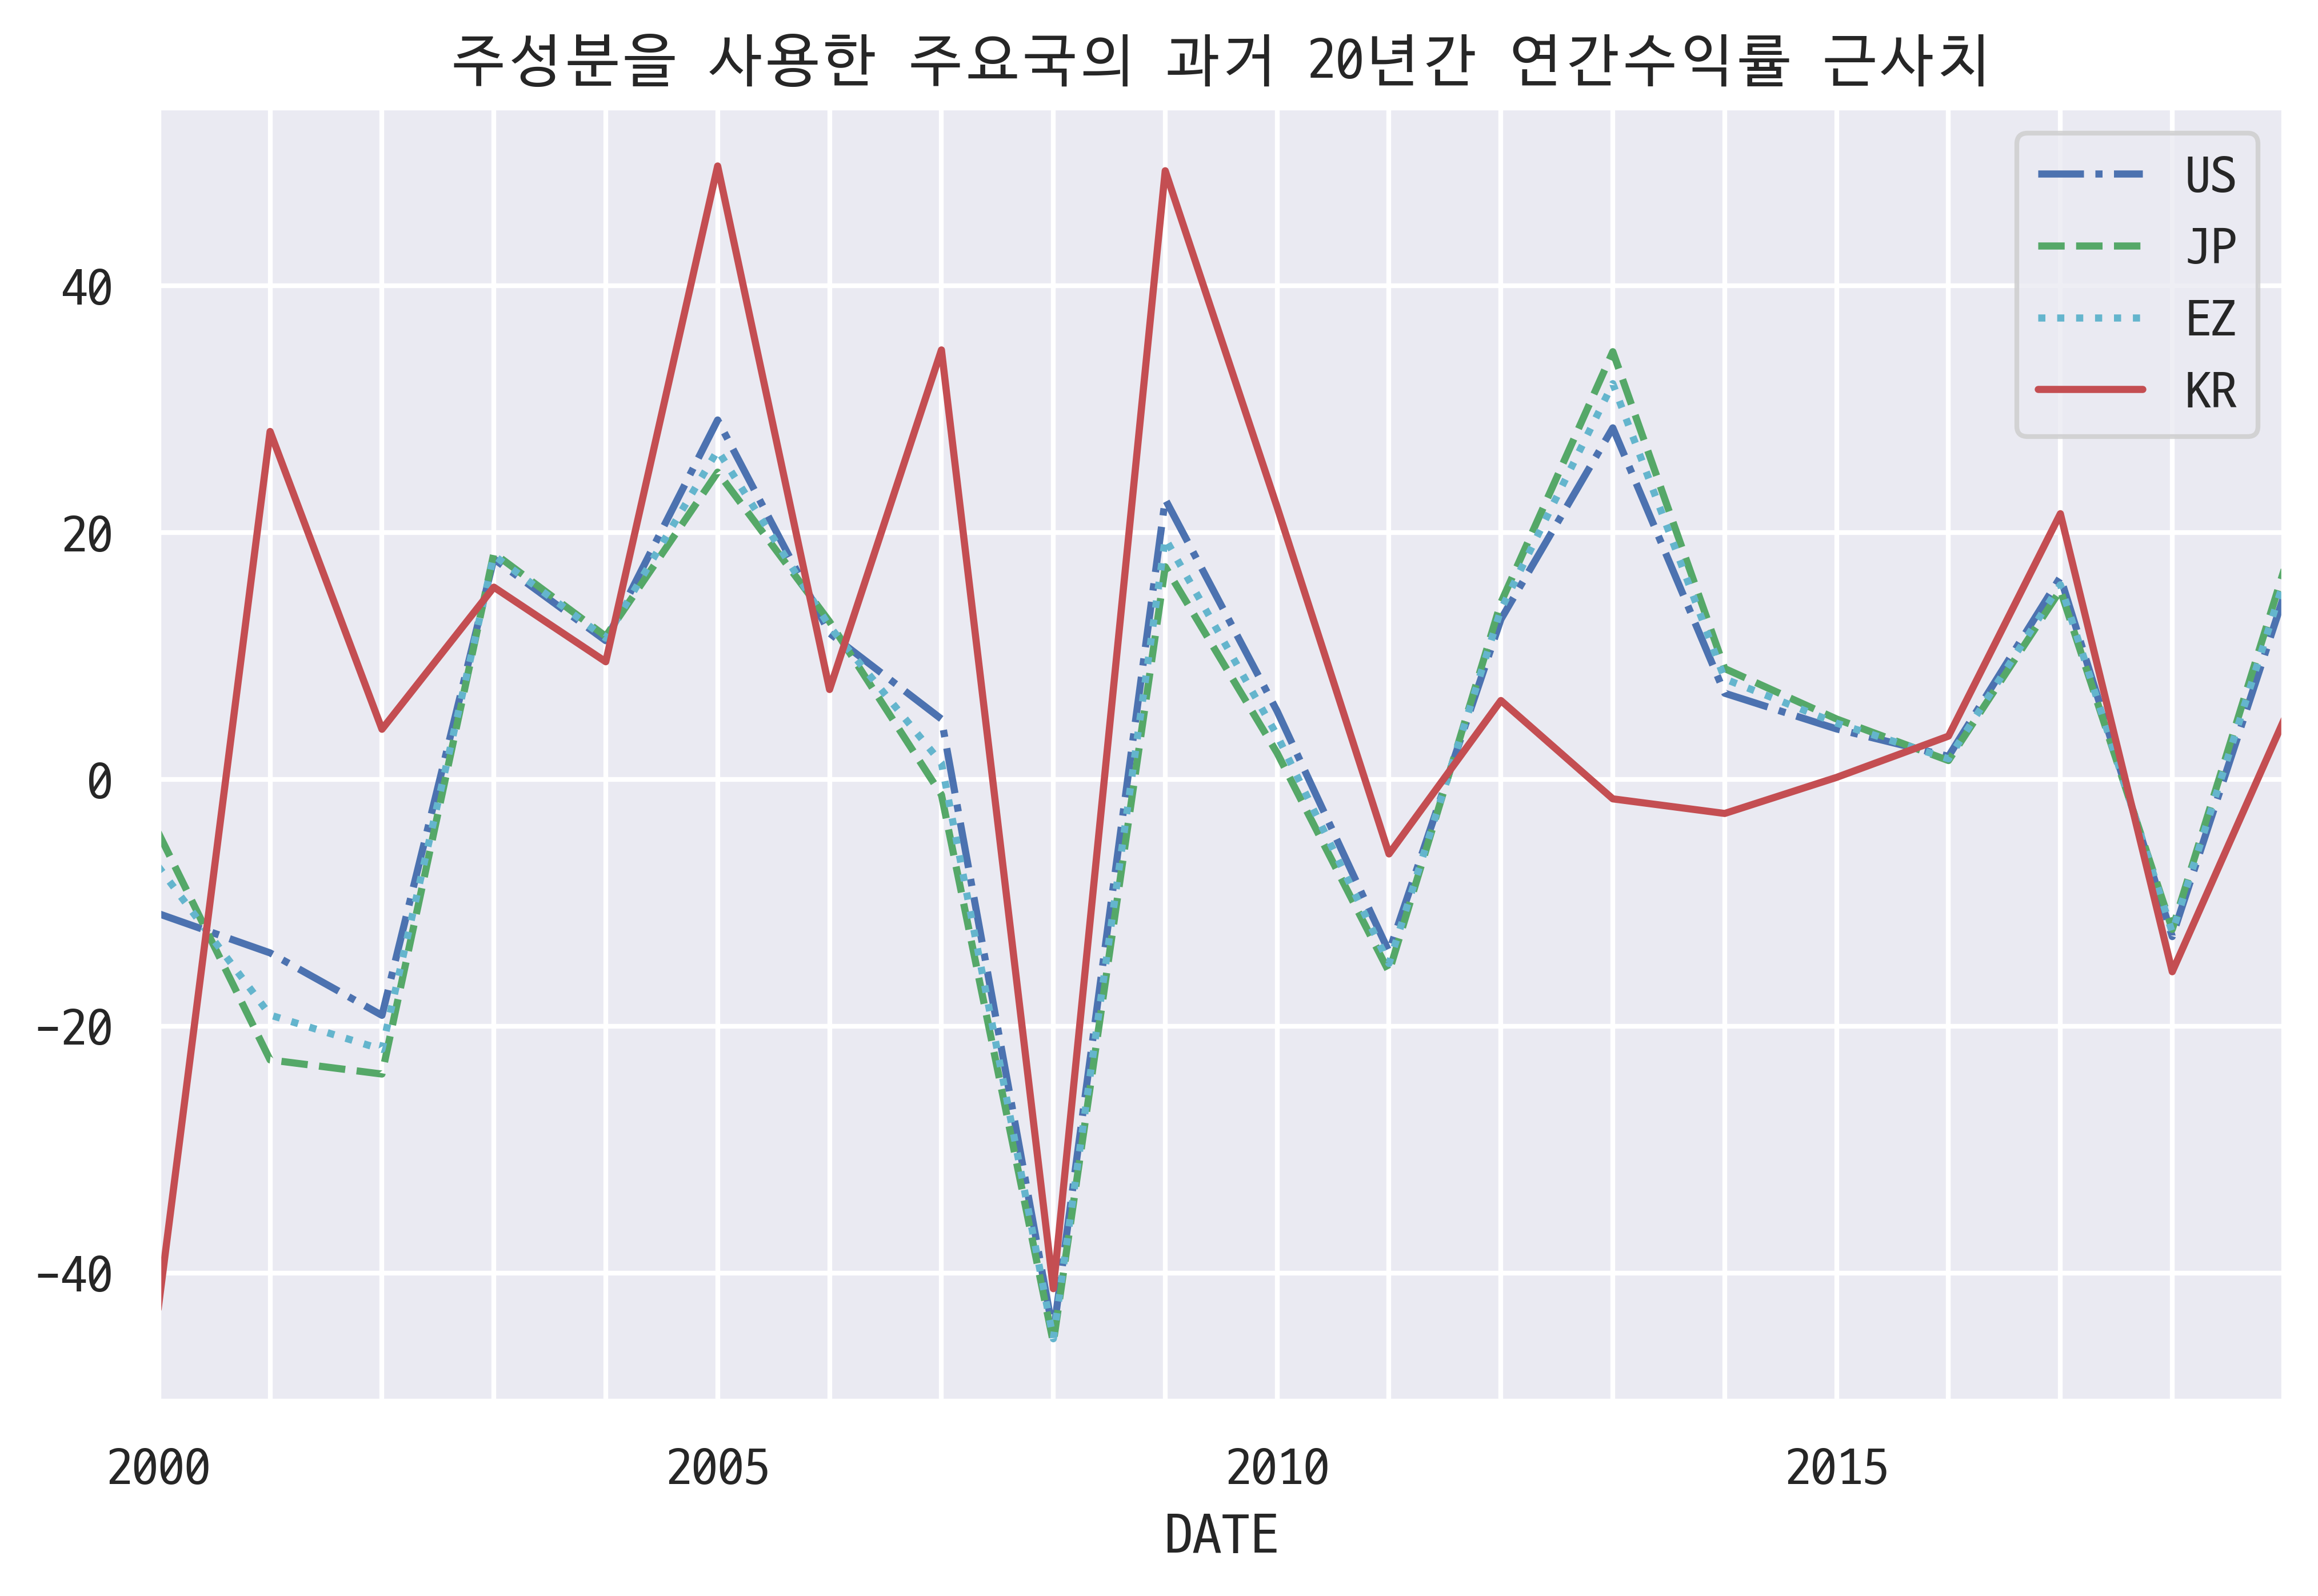

In [127]:
df_i = pd.DataFrame(pca2.inverse_transform(w))
df_i.index = df.index
df_i.columns = df.columns
df_i.iloc[:, -10:]
df_i.T.plot(style=styles)
plt.title("주성분을 사용한 주요국의 과거 20년간 연간수익률 근사치")
plt.xticks(df.columns)
plt.show()